# Predictive Modeling of Car Prices for Market Entry Strategy in the US Auto Industry



# What We Are Trying to Solve 


We are required to model the price of cars with the available independent 
variables. It will be used by the management to understand how exactly 
the prices vary with the independent variables. They can accordingly 
manipulate the design of the cars, the business strategy etc. to meet 
certain price levels. Further, the model will be a good way for management 
to understand the pricing dynamics of a new market.

 
# Dataset Information 


The dataset contains information on various cars, with several attributes (or 
columns) describing different aspects of each car. Here is an explanation of 
each column present in the data: 

# Column Information 

➢ car_ID: A unique identifier for each car. 

➢ symboling: An insurance risk rating, ranging from -3 to 3, where higher values indicate a higher risk. 

➢ CarName: The name of the car, which includes both the brand and model. 

➢ fueltype: The type of fuel used by the car (e.g., gas, diesel). 

➢ aspiration: Indicates whether the car has a standard (std) or turbocharged (turbo) engine. 

➢ doornumber: The number of doors on the car (e.g., two, four). 

➢ carbody: The body style of the car (e.g., convertible, hatchback, sedan, wagon, hardtop).

➢ drivewheel: The type of drive system the car uses (e.g., fwd for front wheel drive, rwd for rear-wheel drive, 4wd for four-wheel drive).
    
➢ enginelocation: The location of the engine in the car (e.g., front, rear). 

➢ wheelbase: The distance between the front and rear axles (measured in inches).

➢ carlength: The overall length of the car (measured in inches). 

➢ carwidth: The overall width of the car (measured in inches). 

➢ carheight: The overall height of the car (measured in inches). 

➢ curbweight: The weight of the car without passengers or cargo (measured in pounds).

➢ enginetype: The type of engine (e.g., dohc, ohcv, ohc, rotor, dohcv, l, ohcf).
    
➢ cylindernumber: The number of cylinders in the engine (e.g., two, three, four, five, six, eight, twelve).

➢ enginesize: The size of the engine (measured in cubic inches). 

➢ fuelsystem: The type of fuel system (e.g., mpfi, 2bbl, 1bbl, spdi, 4bbl, idi, spfi). 

➢ boreratio: The ratio of the bore (diameter of the cylinder) to the stroke (length of the cylinder).

➢ stroke: The length of the piston stroke within the cylinder. 

➢ compressionratio: The ratio of the maximum to minimum volume in the cylinder.

➢ horsepower: The power output of the engine (measured in horsepower).

➢ peakrpm: The maximum revolutions per minute (RPM) of the engine. 

➢ citympg: The fuel efficiency of the car in city driving conditions (measured in miles per gallon). 

➢ highwaympg: The fuel efficiency of the car in highway driving conditions (measured in miles per gallon).

➢ price: The price of the car (measured in USD), which is the target variable for prediction.                    

# Implementation
# Importing Libraries 

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor


# Read the Dataset

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [6]:
df.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

In [8]:
df.shape

(205, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.drop(columns = ["car_ID"], inplace = True)

In [12]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Column Values for each column

In [13]:
df['symboling']=df['symboling'].astype('str')
df['symboling'].unique()

array(['3', '1', '2', '0', '-1', '-2'], dtype=object)

In [14]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [15]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [17]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [18]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [19]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [20]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [21]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [22]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [23]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [24]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

# Data Cleaning

# Check for Duplicate Values

In [25]:
df.duplicated().sum()

0

# Check for Null Values

In [26]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Separate Catagorical Columns

In [27]:
categorical_cols=df.select_dtypes(include=['object']).columns

In [28]:
df[categorical_cols].head(3)

symboling                   CarName fueltype aspiration doornumber  \
0         3        alfa-romero giulia      gas        std        two   
1         3       alfa-romero stelvio      gas        std        two   
2         1  alfa-romero Quadrifoglio      gas        std        two   

       carbody drivewheel enginelocation enginetype cylindernumber fuelsystem  
0  convertible        rwd          front       dohc           four       mpfi  
1  convertible        rwd          front       dohc           four       mpfi  
2    hatchback        rwd          front       ohcv            six       mpfi

# Visualization

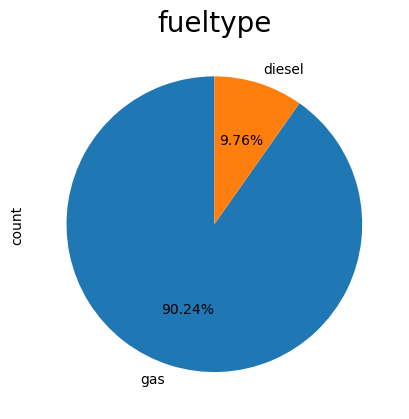

In [29]:
plt.title('fueltype', fontsize=20)
df['fueltype'].value_counts().plot.pie(startangle = 90,autopct = '%0.2f%%', fontsize = 10)
plt.show()

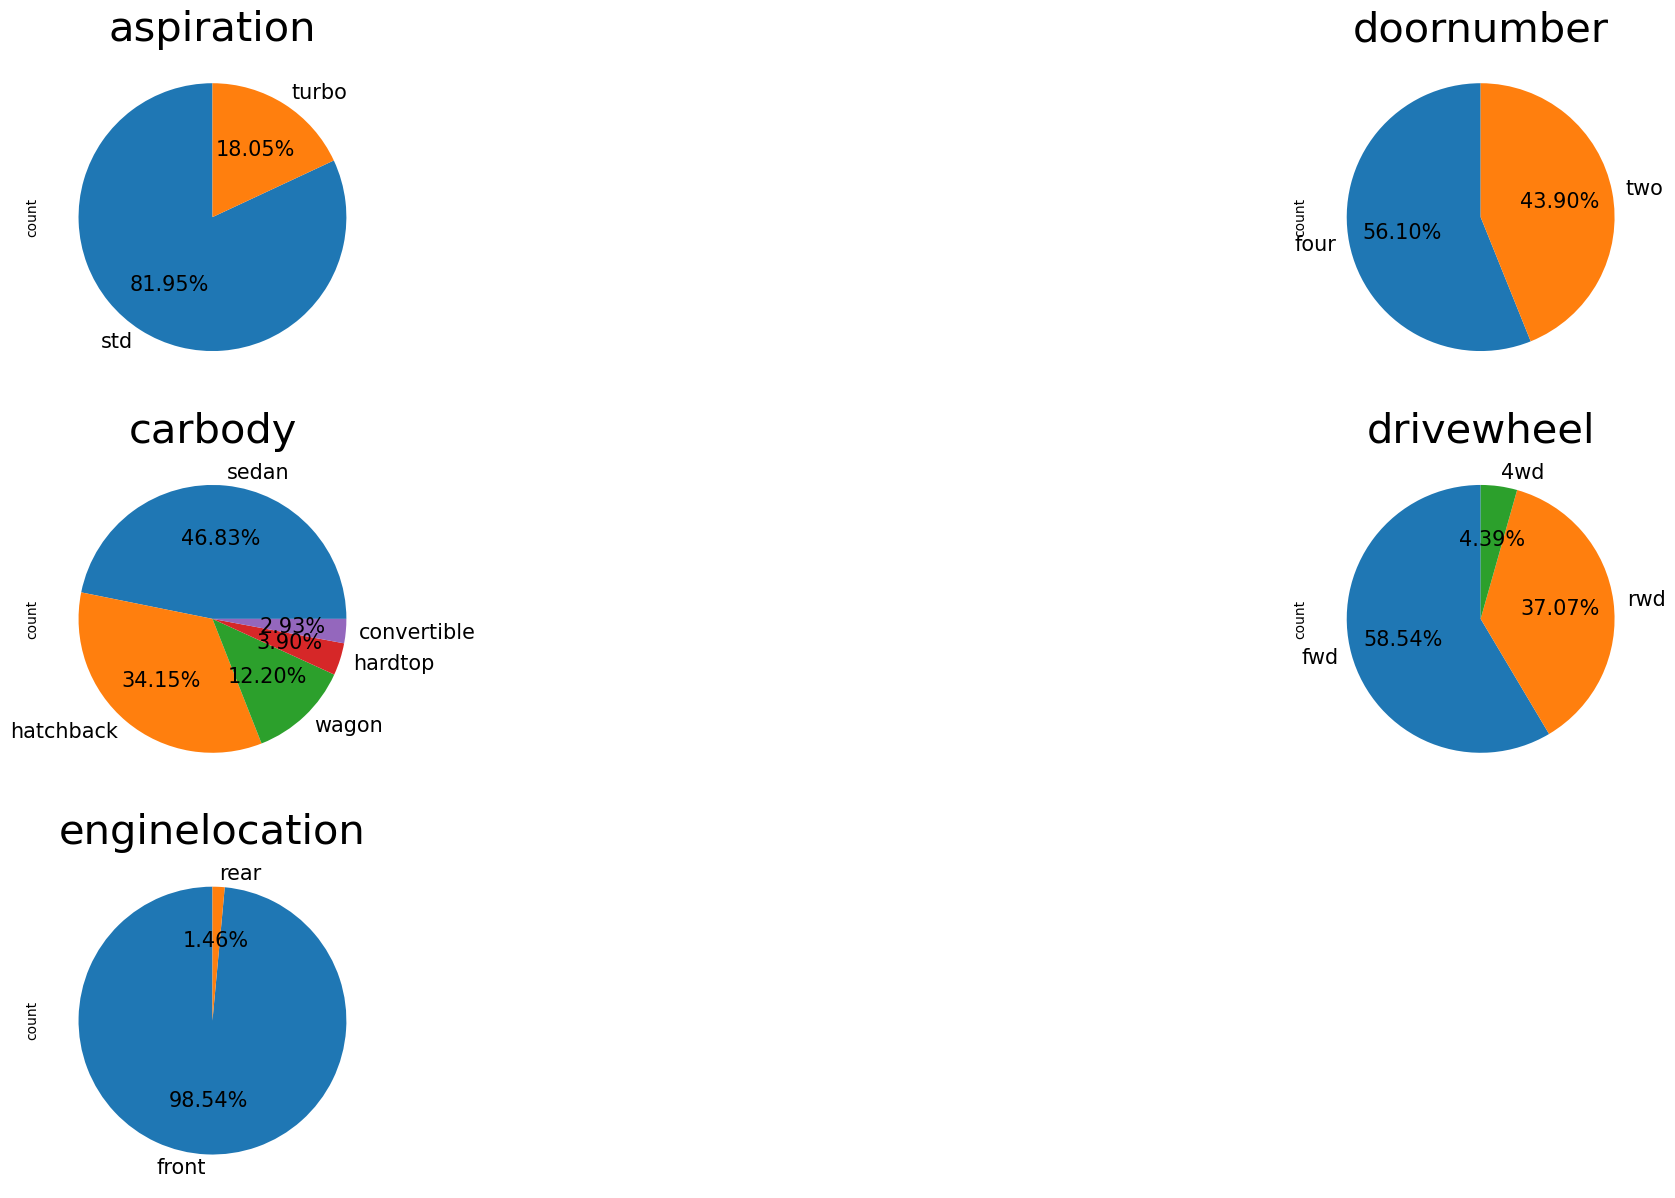

In [30]:
plt.figure(figsize=(30,20))

plt.subplot(421)
plt.title('aspiration' , fontsize = 30 )
df['aspiration'].value_counts().plot.pie(startangle = 90,autopct = "%0.2f%%" , fontsize = 15)

plt.subplot(422)
plt.title('doornumber' , fontsize = 30 )
df['doornumber'].value_counts().plot.pie(startangle = 90,autopct = "%0.2f%%" , fontsize = 15)

plt.subplot(423)
plt.title('carbody' , fontsize = 30 )
df['carbody'].value_counts().plot.pie(autopct = "%0.2f%%" , fontsize = 15)

plt.subplot(424)
plt.title('drivewheel' , fontsize = 30 )
df['drivewheel'].value_counts().plot.pie(startangle = 90,autopct = "%0.2f%%" , fontsize = 15)

plt.subplot(425)
plt.title('enginelocation' , fontsize = 30 )
df['enginelocation'].value_counts().plot.pie(startangle = 90,autopct = "%0.2f%%" , fontsize = 15)


plt.show()

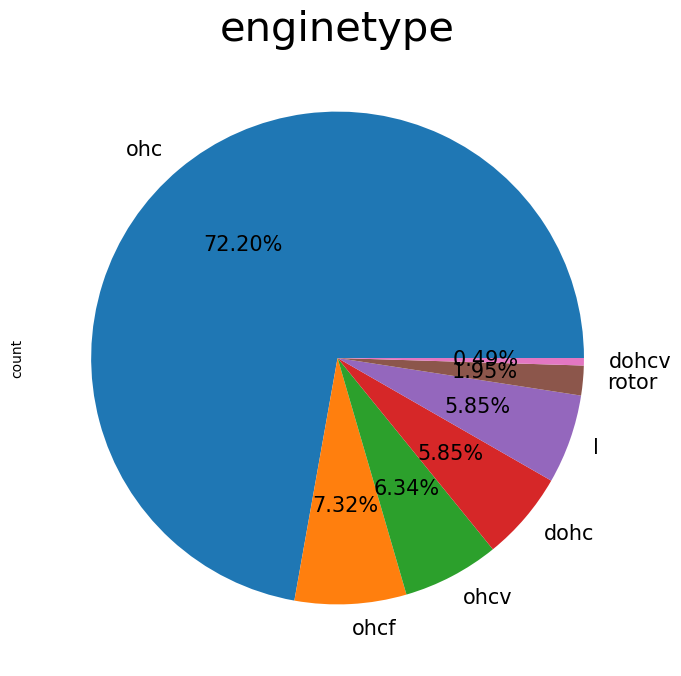

In [31]:
plt.figure(figsize=(10,8))

plt.title('enginetype' , fontsize = 30 )
df['enginetype'].value_counts().plot.pie(autopct = "%0.2f%%" , fontsize = 15)
plt.show()

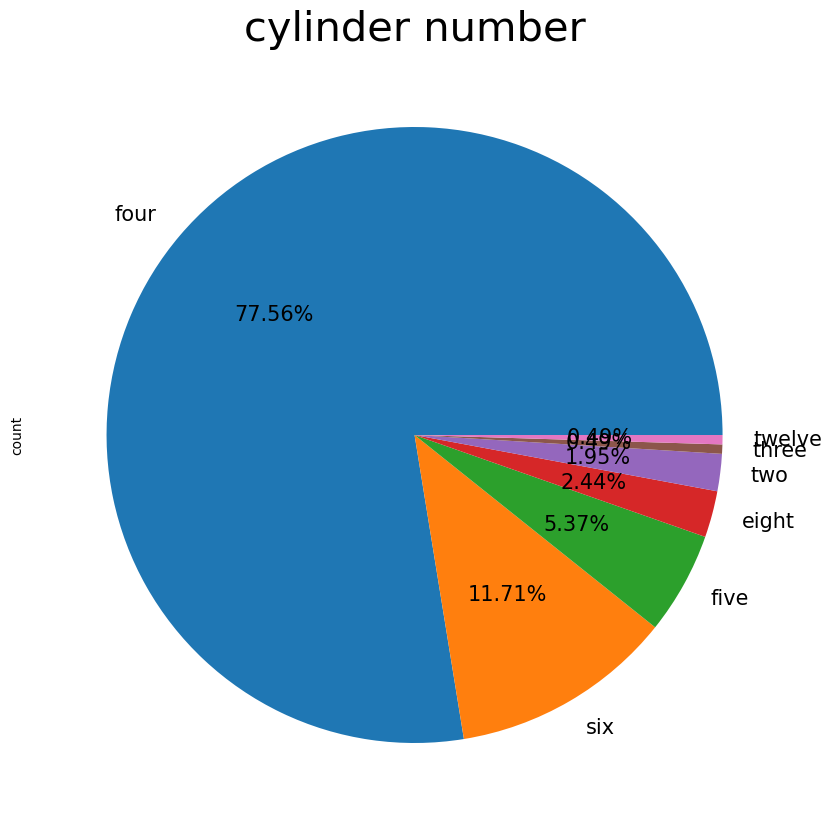

In [32]:
plt.figure(figsize=(10,10))

plt.title('cylinder number' , fontsize = 30 )
df['cylindernumber'].value_counts().plot.pie(startangle = 0,autopct = "%0.2f%%" , fontsize = 15)

plt.show()

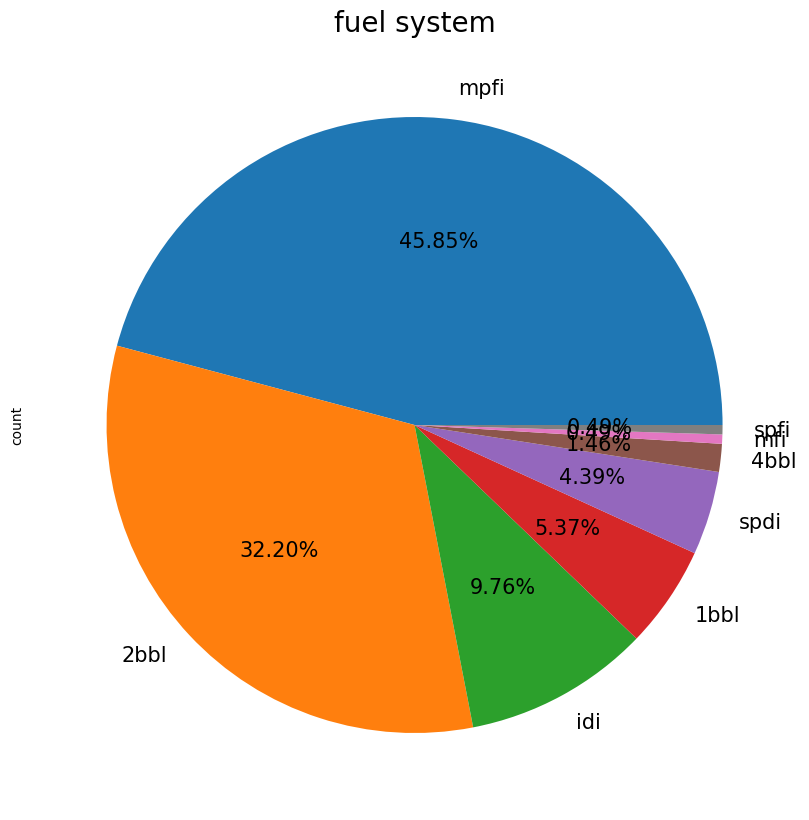

In [33]:
plt.figure(figsize=(10,10))

plt.title('fuel system' , fontsize = 20 )
df['fuelsystem'].value_counts().plot.pie(startangle = 0,autopct = "%0.2f%%" , fontsize = 15)

plt.show()

C:\Users\SOHAM PORIA\AppData\Local\Temp\ipykernel_24176\497753516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"], kde=True)


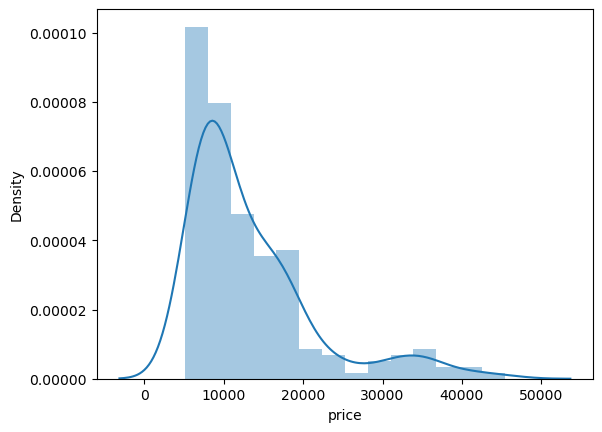

In [34]:
sns.distplot(df["price"], kde=True)
plt.show()

# Price distribution of diesel vs gas car

C:\Users\SOHAM PORIA\AppData\Local\Temp\ipykernel_24176\3387809367.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.fueltype== 'gas')]["price"],color='b',ax=ax)
C:\Users\SOHAM PORIA\AppData\Local\Temp\ipykernel_24176\3387809367.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df

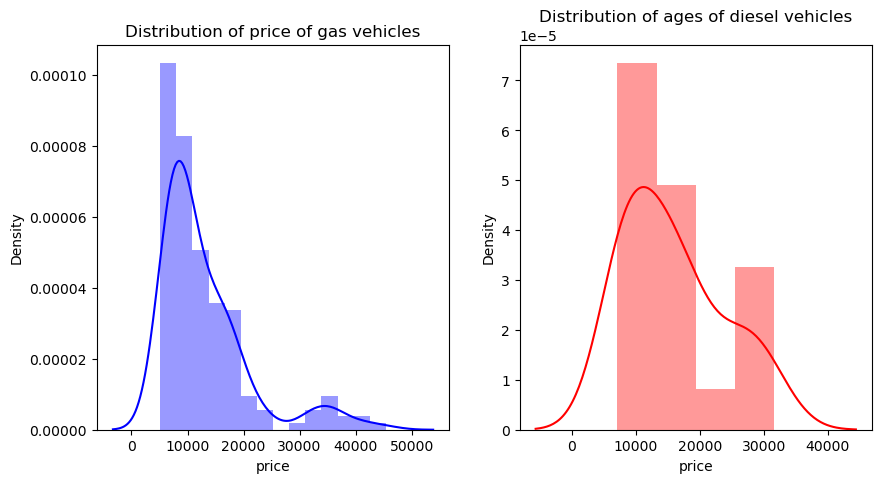

In [35]:
f= plt.figure(figsize=(10,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(df[(df.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

plt.show()

C:\Users\SOHAM PORIA\AppData\Local\Temp\ipykernel_24176\2515967561.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'fueltype', y = 'price', data = df,palette='Pastel2')


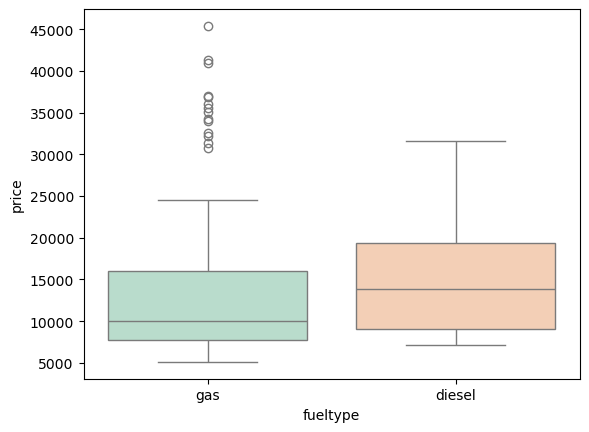

In [36]:
sns.boxplot(x = 'fueltype', y = 'price', data = df,palette='Pastel2')

plt.show()


# Price distribution of Std vs Turbo aspiration vehicles

C:\Users\SOHAM PORIA\AppData\Local\Temp\ipykernel_24176\446368440.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.aspiration== 'std')]['price'],color='#ca91eb', ax=ax)
C:\Users\SOHAM PORIA\AppData\Local\Temp\ipykernel_24176\446368440.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

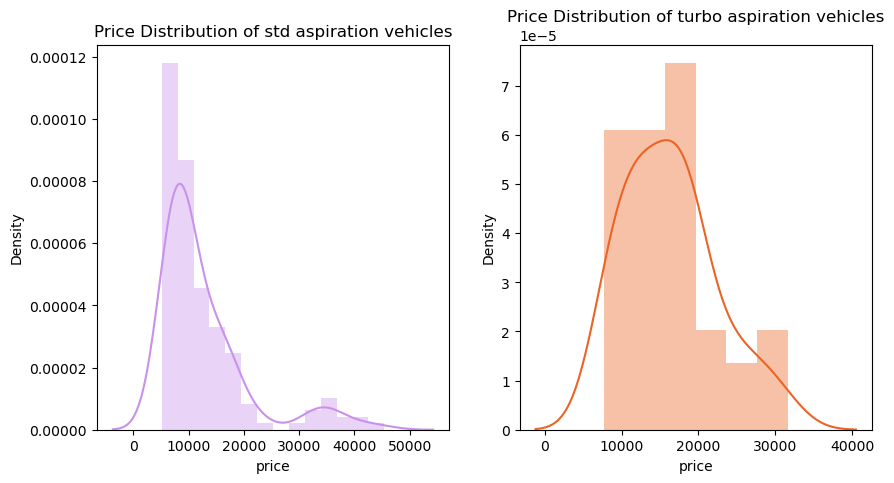

In [37]:
f = plt.figure(figsize=(10,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.aspiration== 'std')]['price'],color='#ca91eb', ax=ax)
ax.set_title('Price Distribution of std aspiration vehicles')

ax=f.add_subplot(122)
sns.distplot(df[(df.aspiration== 'turbo')]['price'],color='#eb6426', ax=ax)
ax.set_title('Price Distribution of turbo aspiration vehicles')

plt.show()

C:\Users\SOHAM PORIA\AppData\Local\Temp\ipykernel_24176\3327027226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'aspiration', y = 'price', data = df,palette='Pastel1')


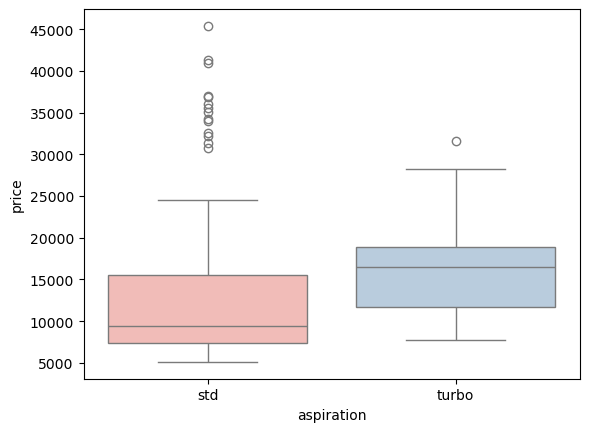

In [38]:
sns.boxplot(x = 'aspiration', y = 'price', data = df,palette='Pastel1')

plt.show()

# Bar Plot

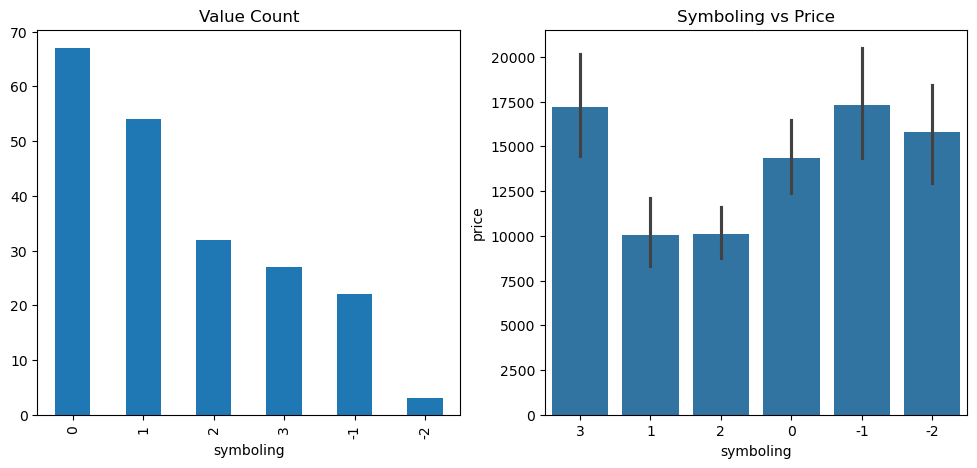

In [39]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('Value Count')
df['symboling'].value_counts().plot(kind='bar')

plt.subplot(122)
sns.barplot(x='symboling',y='price',data=df)
plt.title('Symboling vs Price')
plt.show()

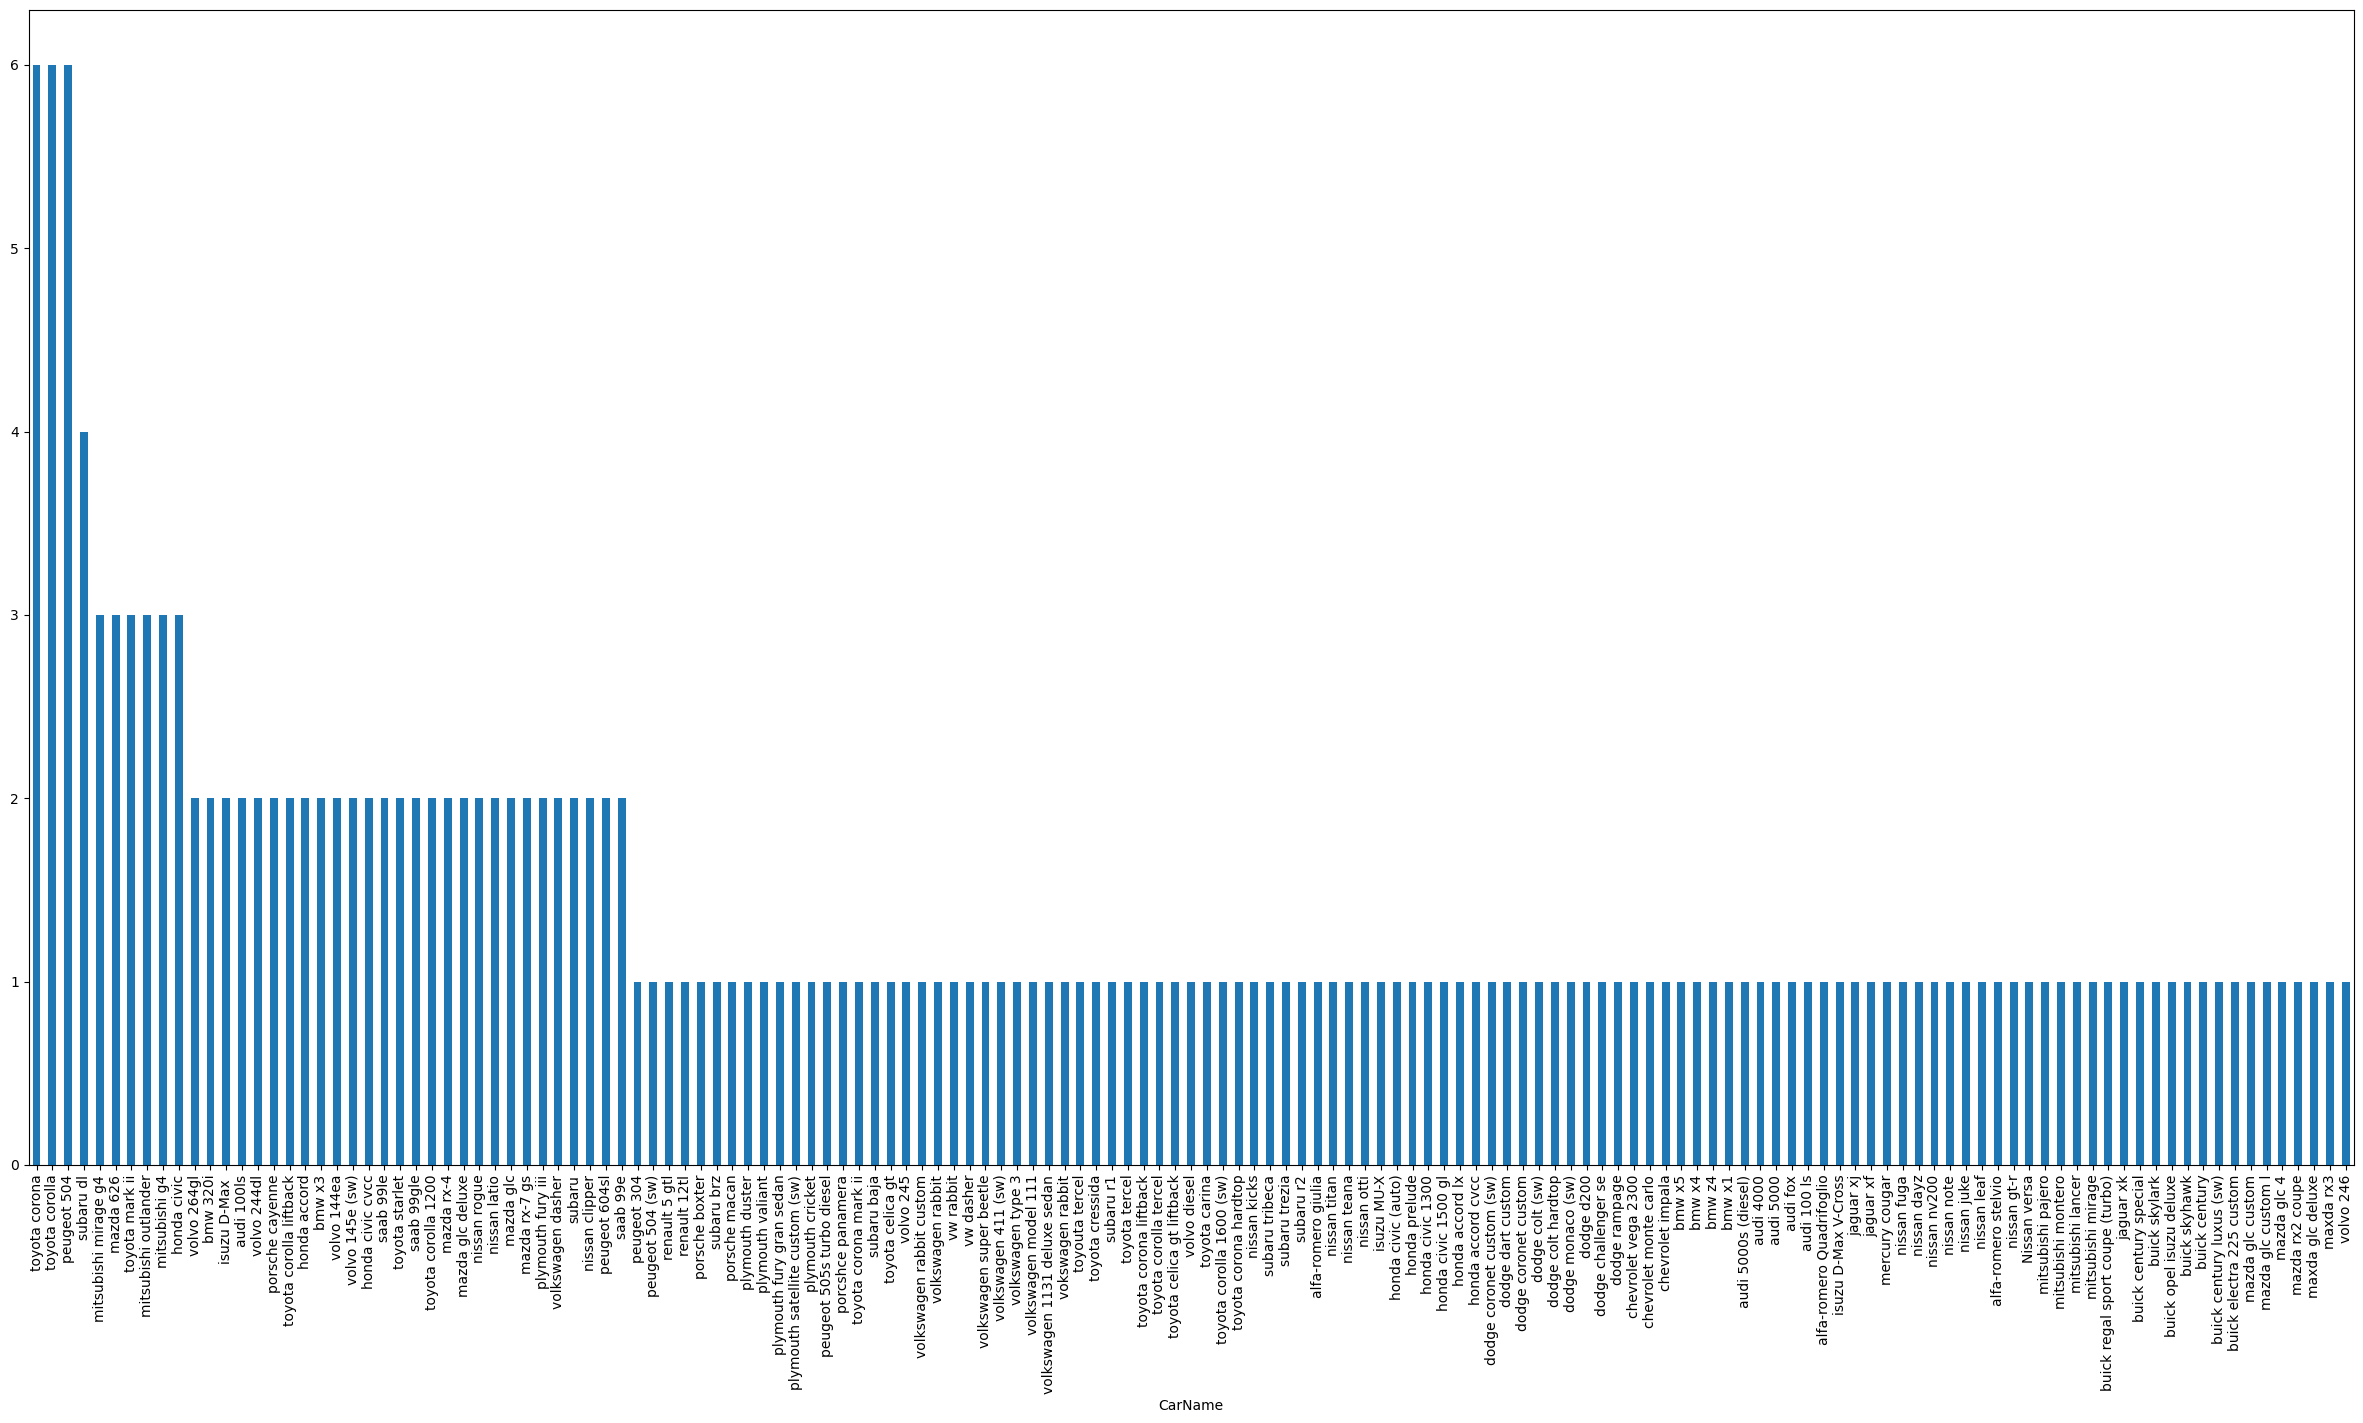

In [40]:
plt.figure(figsize=(30,15))

df['CarName'].value_counts().plot(kind='bar')
plt.show()

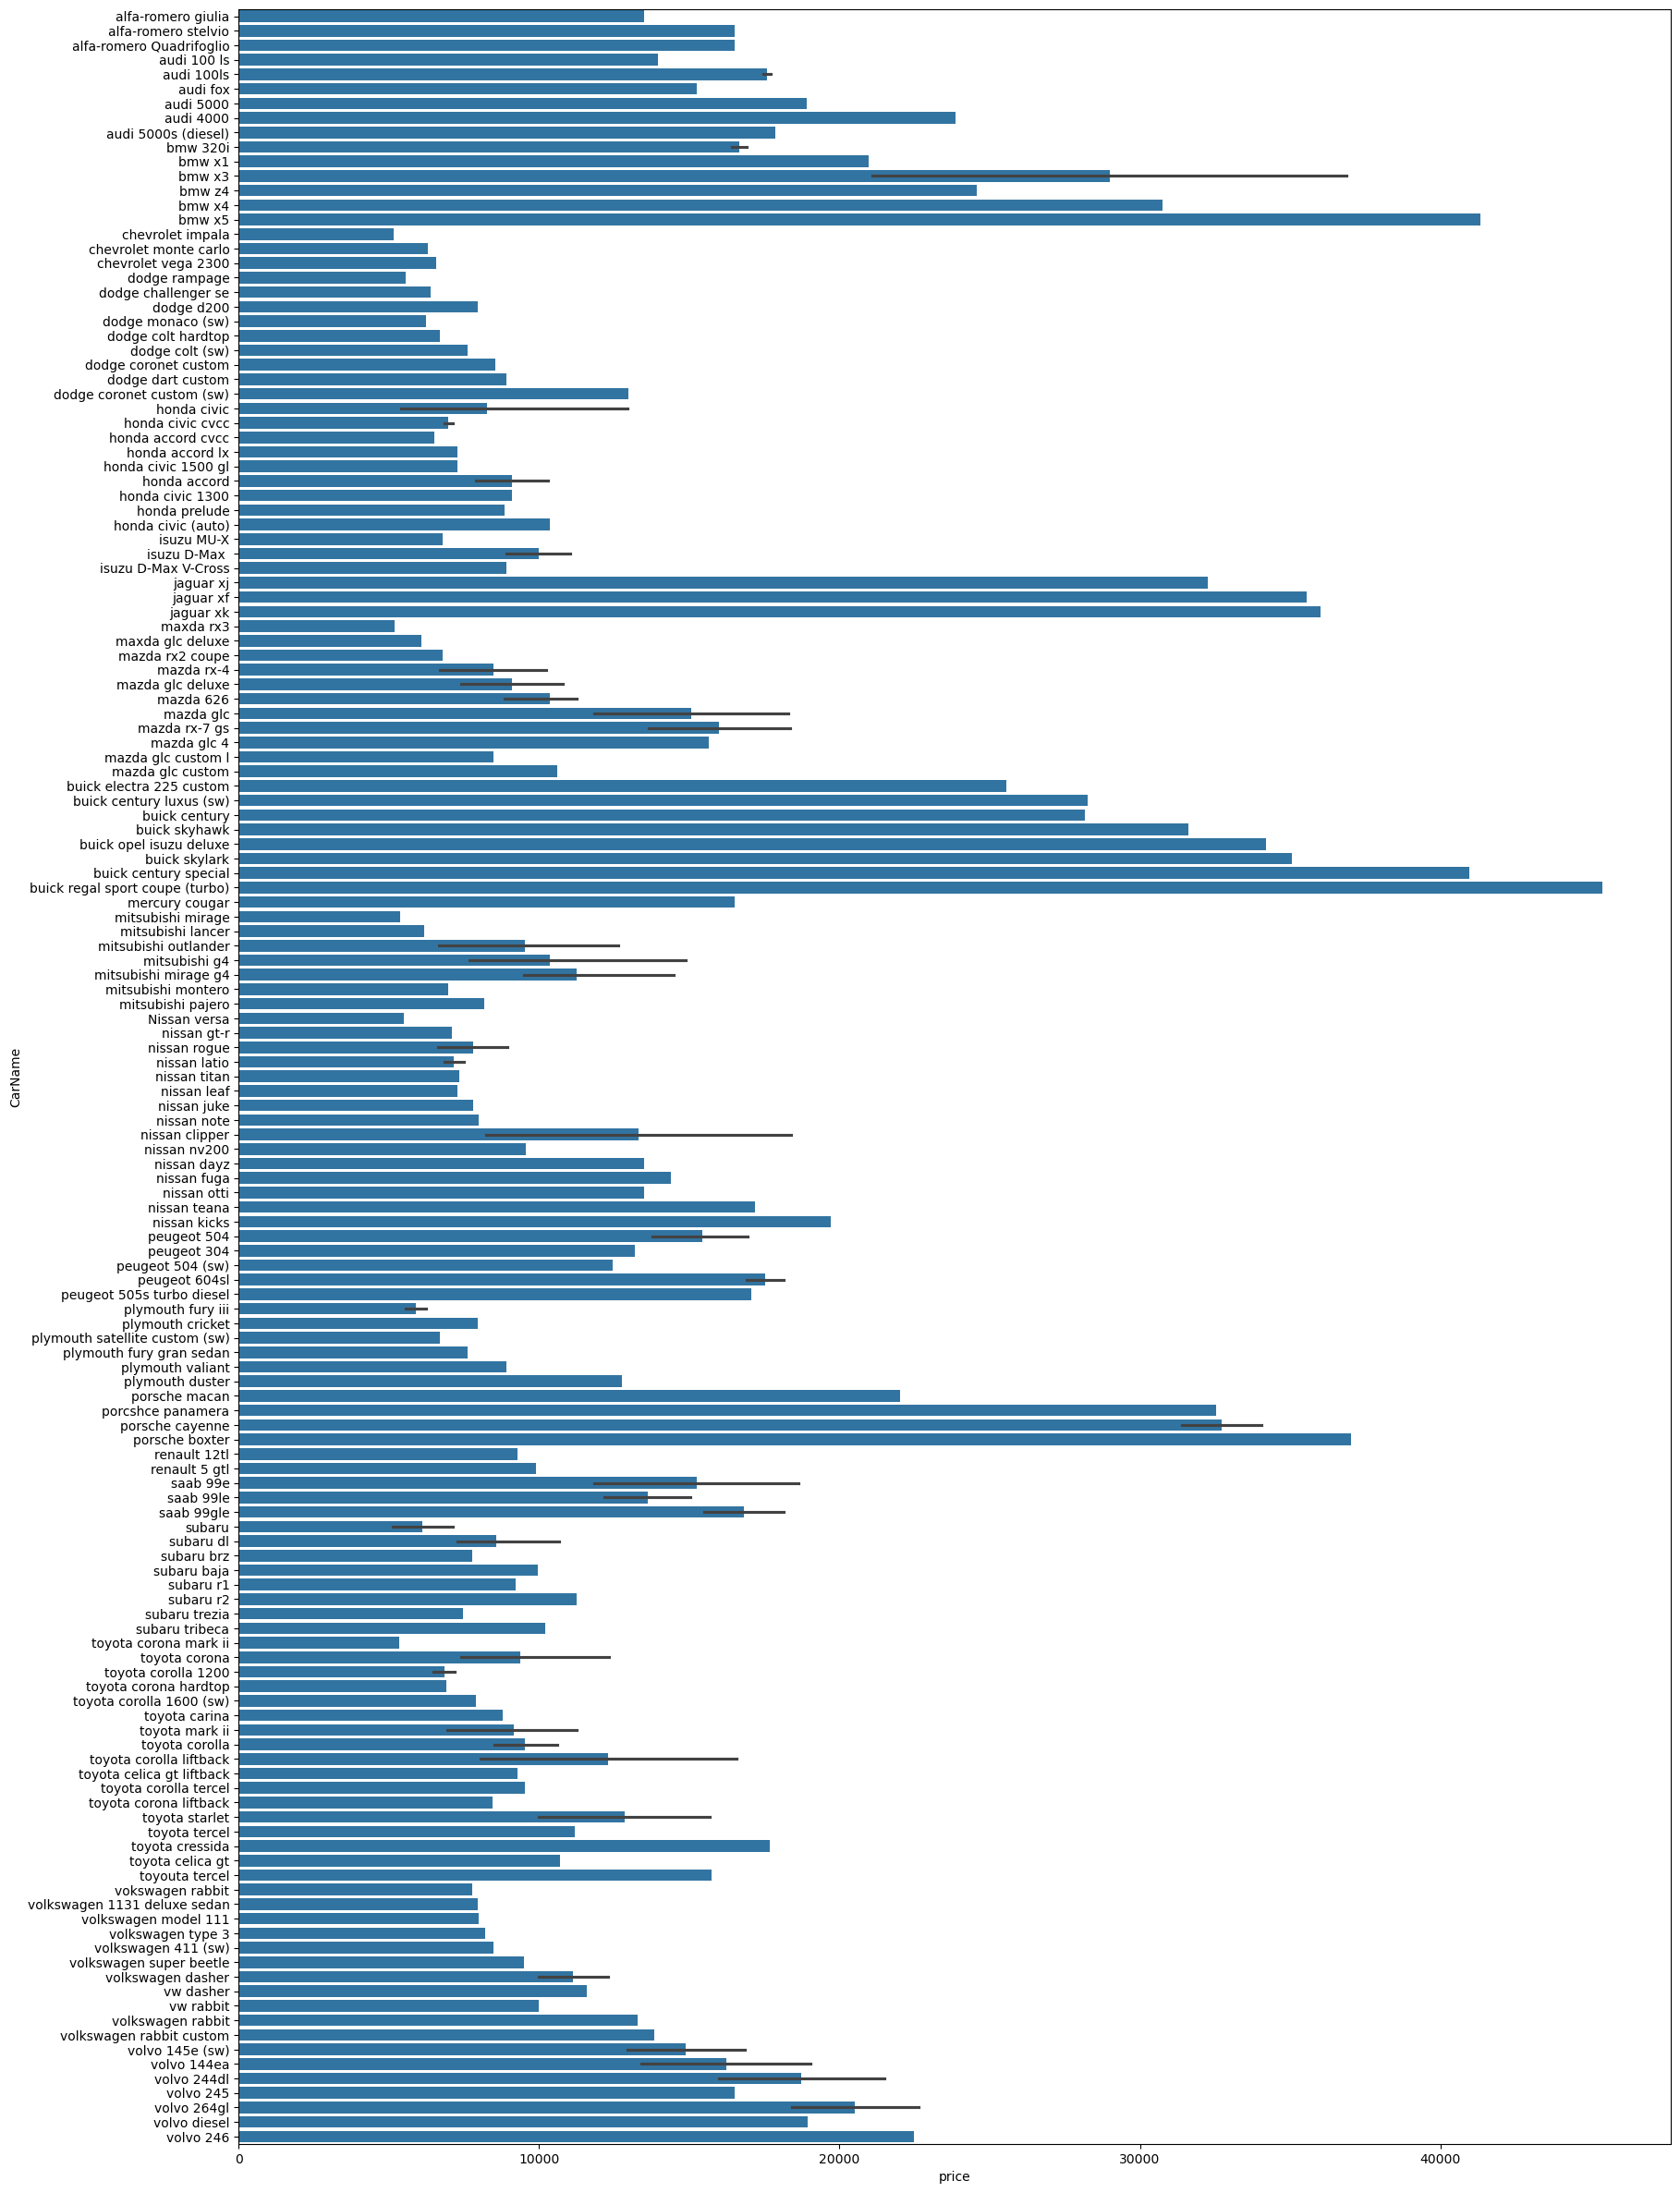

In [41]:
plt.figure(figsize=(20,30))

sns.barplot(y='CarName',x='price',data=df)
plt.show()

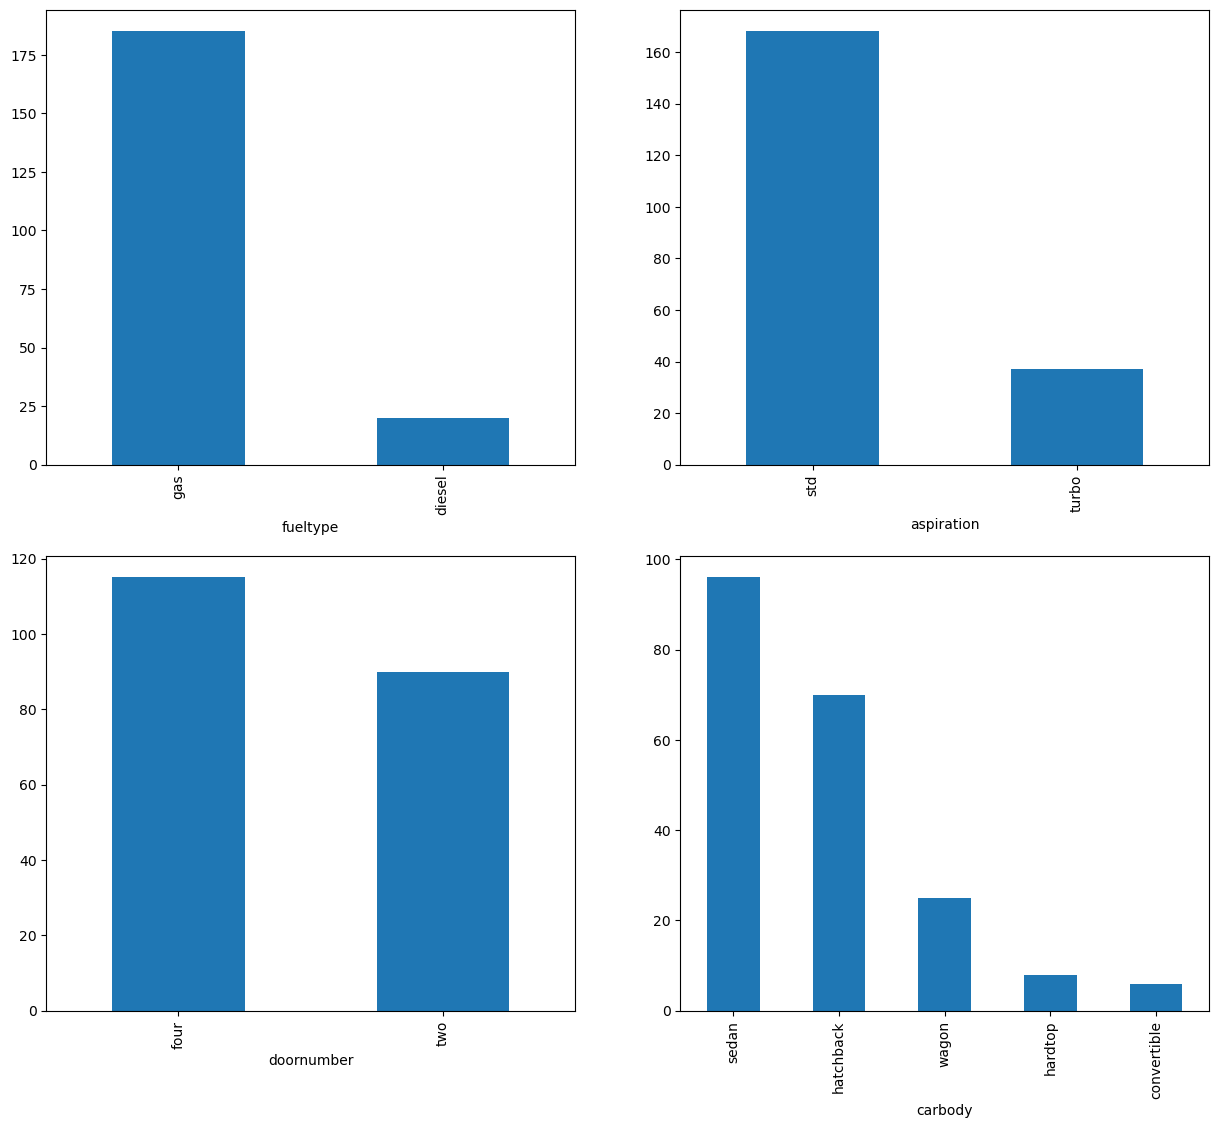

In [42]:
plt.figure(figsize=(15,13))

plt.subplot(221)
df['fueltype'].value_counts().plot(kind='bar')

plt.subplot(222)
df['aspiration'].value_counts().plot(kind='bar')

plt.subplot(223)
df['doornumber'].value_counts().plot(kind='bar')

plt.subplot(224)
df['carbody'].value_counts().plot(kind='bar')

plt.show()

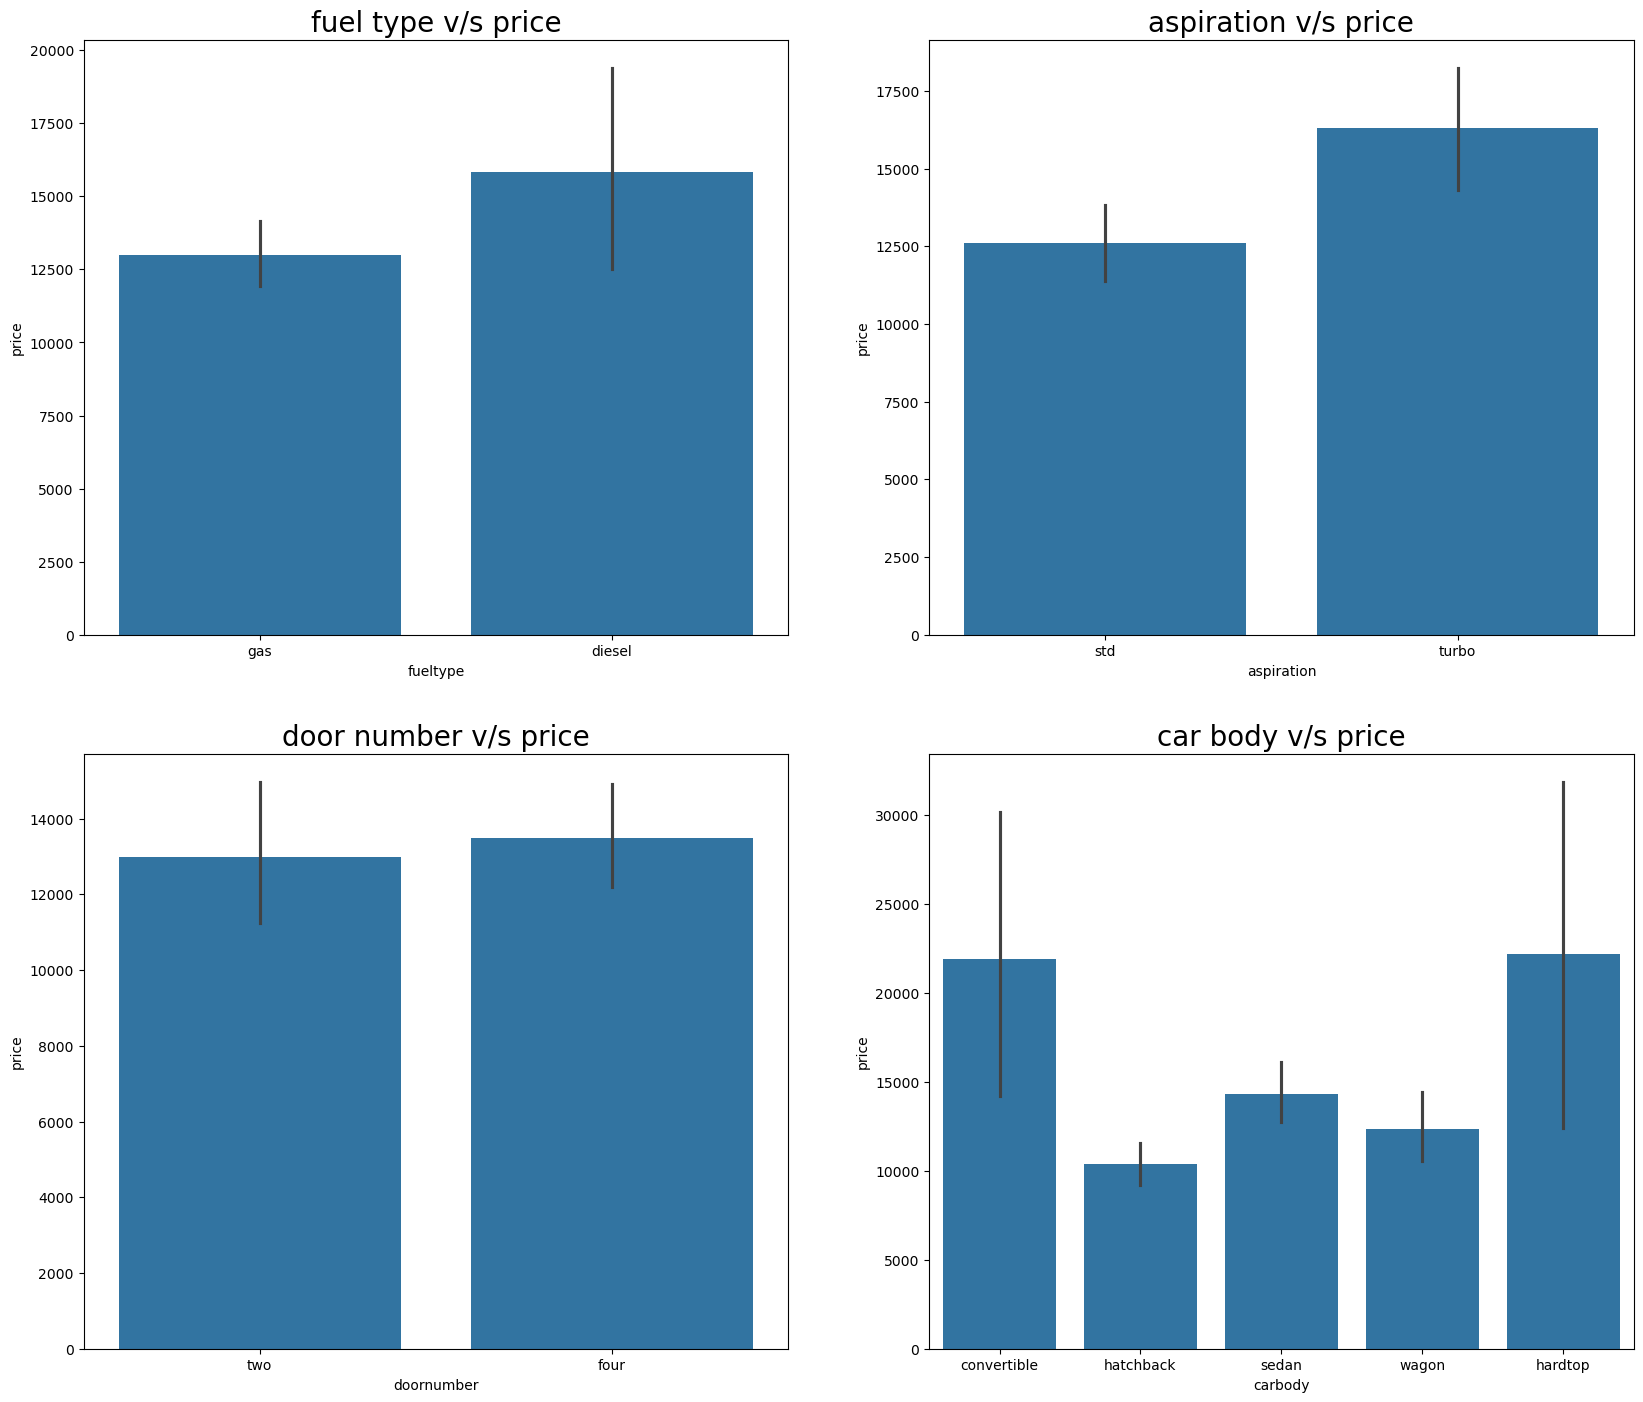

In [43]:
plt.figure(figsize=(20,17))

plt.subplot(221)
plt.title("fuel type v/s price", fontsize=20)
sns.barplot(x='fueltype',y='price',data=df)

plt.subplot(222)
plt.title("aspiration v/s price", fontsize=20)
sns.barplot(x='aspiration',y='price',data=df)

plt.subplot(223)
plt.title("door number v/s price", fontsize=20)
sns.barplot(x='doornumber',y='price',data=df)

plt.subplot(224)
plt.title("car body v/s price", fontsize=20)
sns.barplot(x='carbody',y='price',data=df)

plt.show()

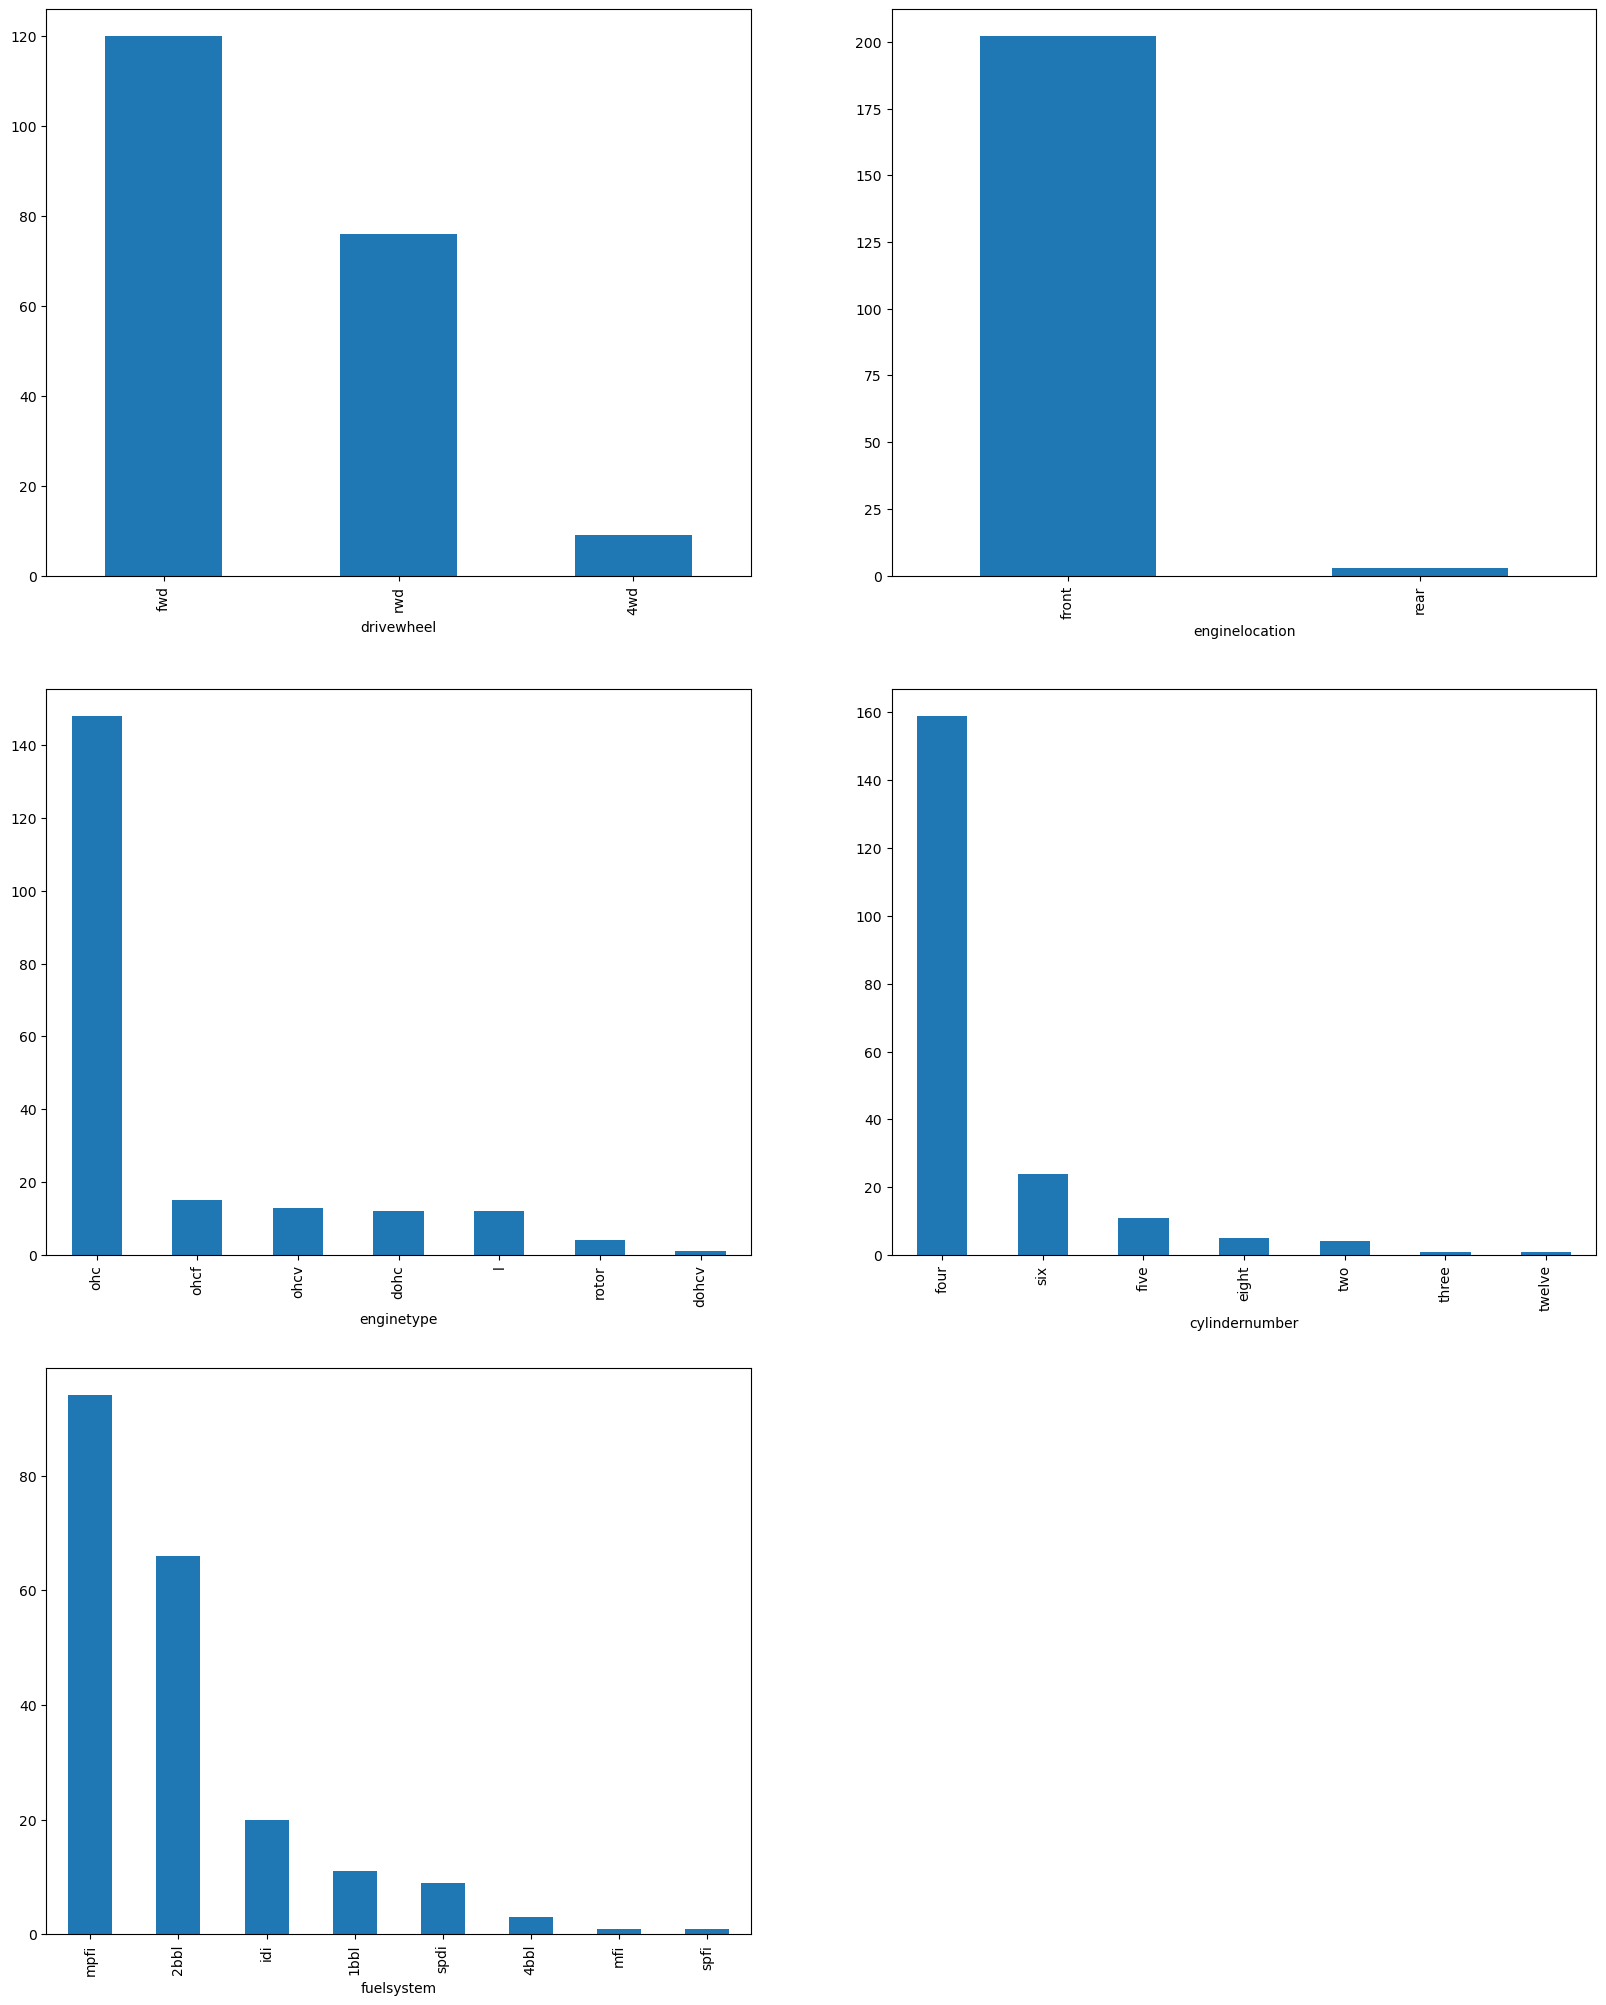

In [44]:
plt.figure(figsize=(20,25))

plt.subplot(321)
df['drivewheel'].value_counts().plot(kind='bar')

plt.subplot(322)
df['enginelocation'].value_counts().plot(kind='bar')

plt.subplot(323)
df['enginetype'].value_counts().plot(kind='bar')

plt.subplot(324)
df['cylindernumber'].value_counts().plot(kind='bar')

plt.subplot(325)
df['fuelsystem'].value_counts().plot(kind='bar')

plt.show()

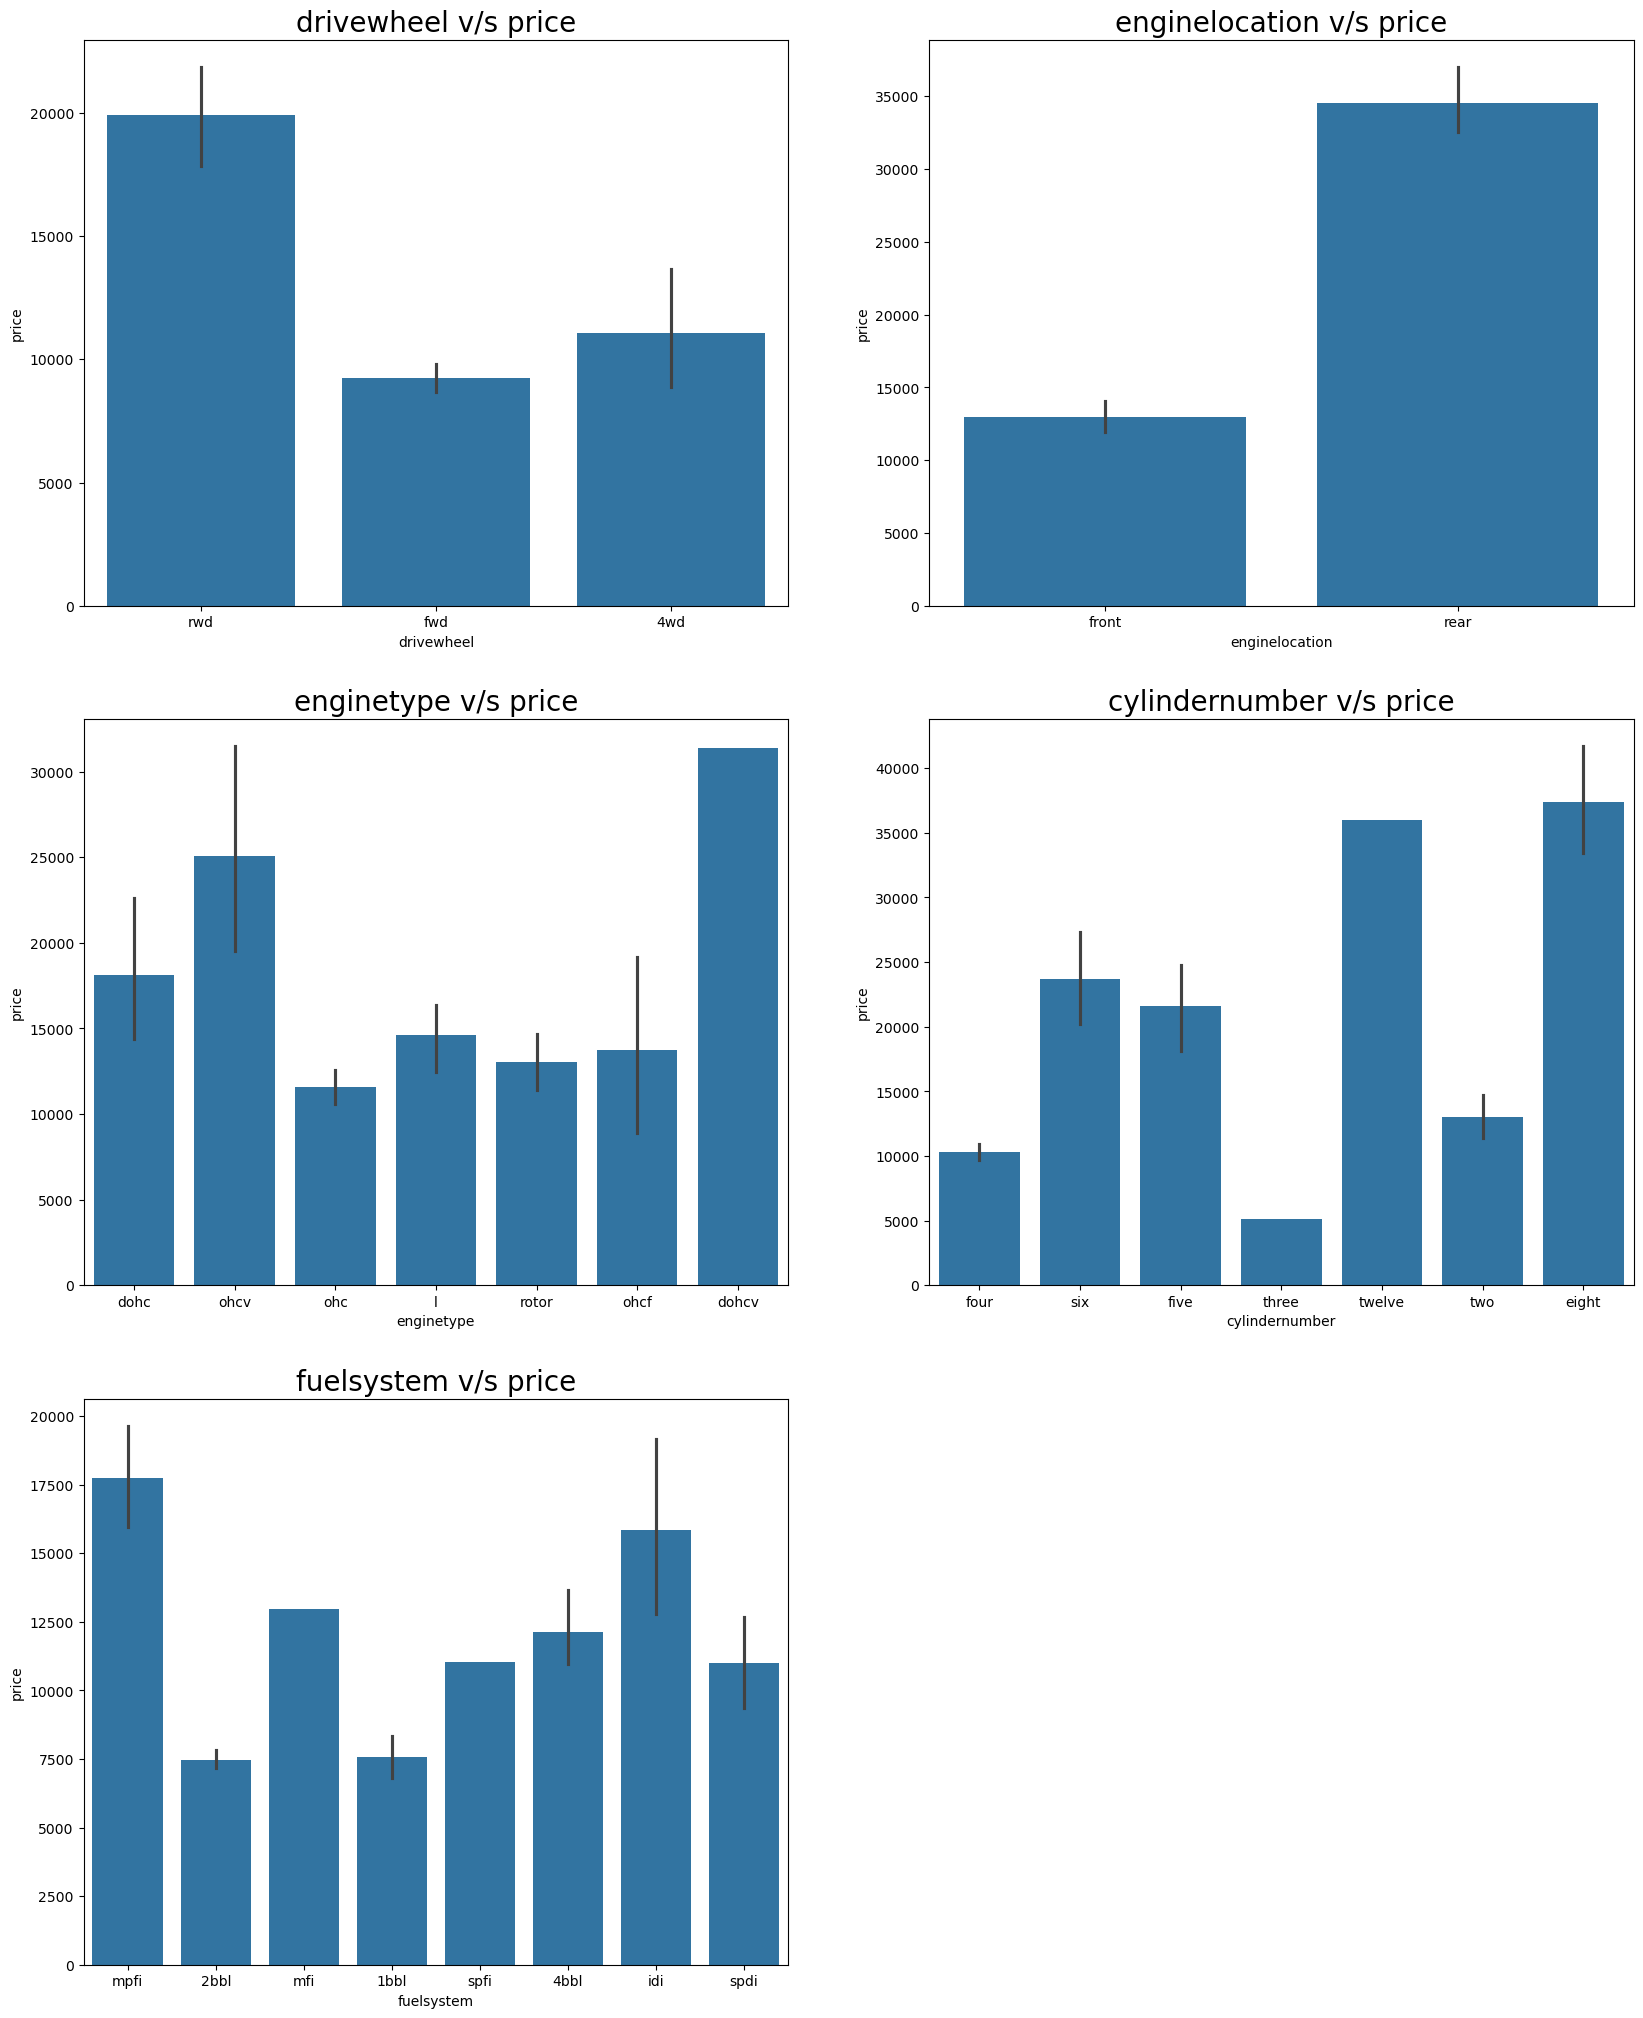

In [45]:
plt.figure(figsize=(20,25))

plt.subplot(321)
plt.title("drivewheel v/s price",fontsize=20)
sns.barplot(x='drivewheel',y='price',data=df)

plt.subplot(322)
plt.title("enginelocation v/s price",fontsize=20)
sns.barplot(x='enginelocation',y='price',data=df)

plt.subplot(323)
plt.title("enginetype v/s price",fontsize=20)
sns.barplot(x='enginetype',y='price',data=df)

plt.subplot(324)
plt.title("cylindernumber v/s price",fontsize=20)
sns.barplot(x='cylindernumber',y='price',data=df)

plt.subplot(325)
plt.title("fuelsystem v/s price",fontsize=20)
sns.barplot(x='fuelsystem',y='price',data=df)

plt.show()

# Visualising Numerical features

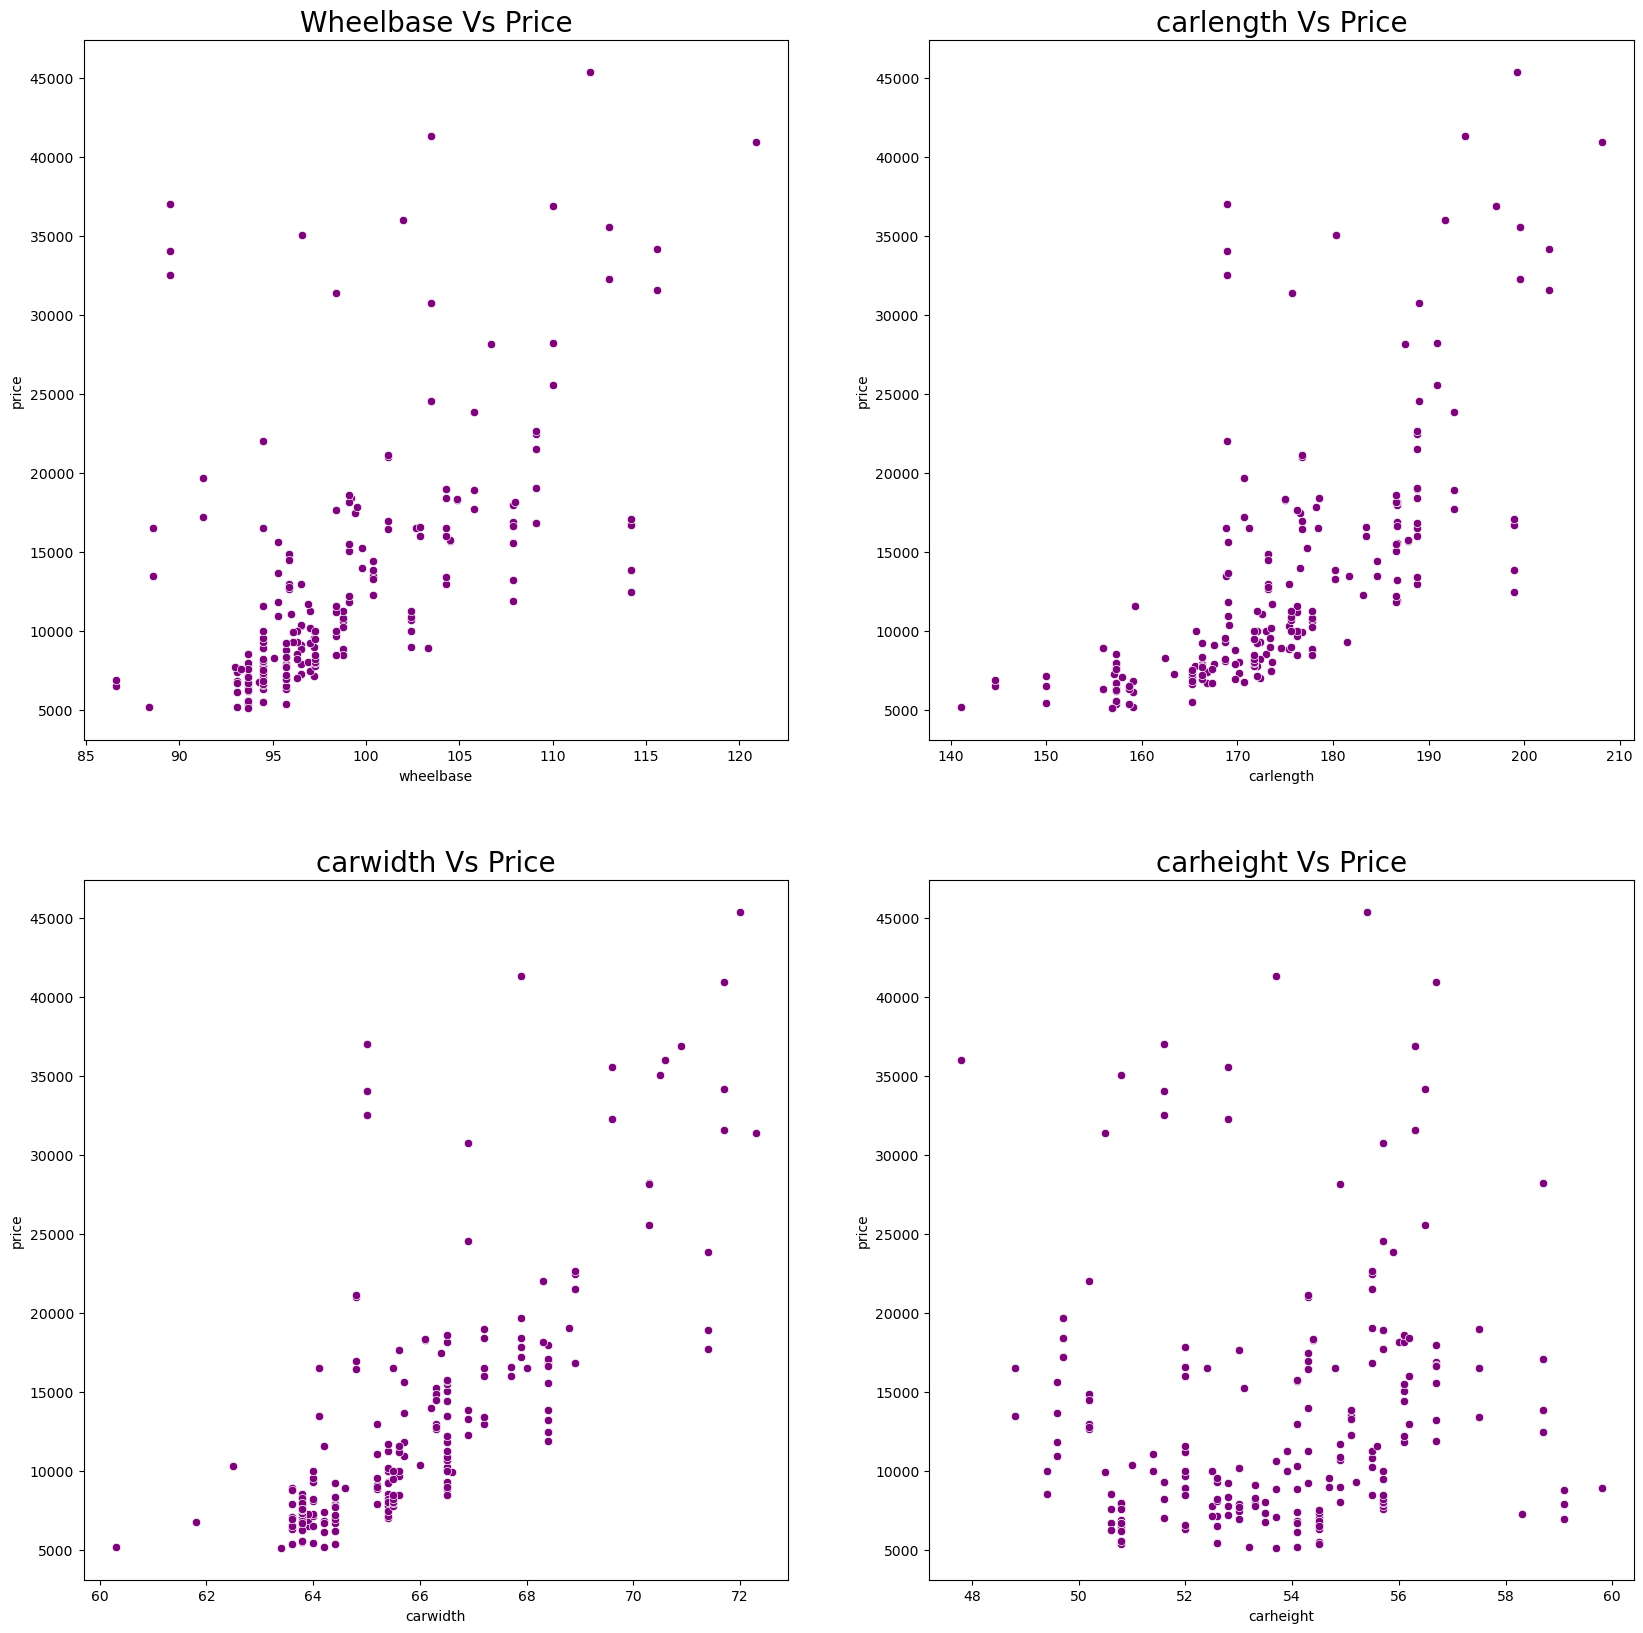

In [46]:
f = plt.figure(figsize=(20,20))

ax=f.add_subplot(221)
sns.scatterplot(x=df['wheelbase'],y=df['price'], c='purple', ax=ax)
ax.set_title('Wheelbase Vs Price', fontsize = 20)

ax=f.add_subplot(222)
sns.scatterplot(x=df['carlength'],y=df['price'], c='purple',ax=ax)
ax.set_title('carlength Vs Price', fontsize = 20)

ax=f.add_subplot(223)
sns.scatterplot(x=df['carwidth'],y=df['price'], c='purple', ax=ax)
ax.set_title('carwidth Vs Price', fontsize = 20)

ax=f.add_subplot(224)
sns.scatterplot(x=df['carheight'],y=df['price'], c='purple', ax=ax)
ax.set_title('carheight Vs Price', fontsize = 20)

plt.show()

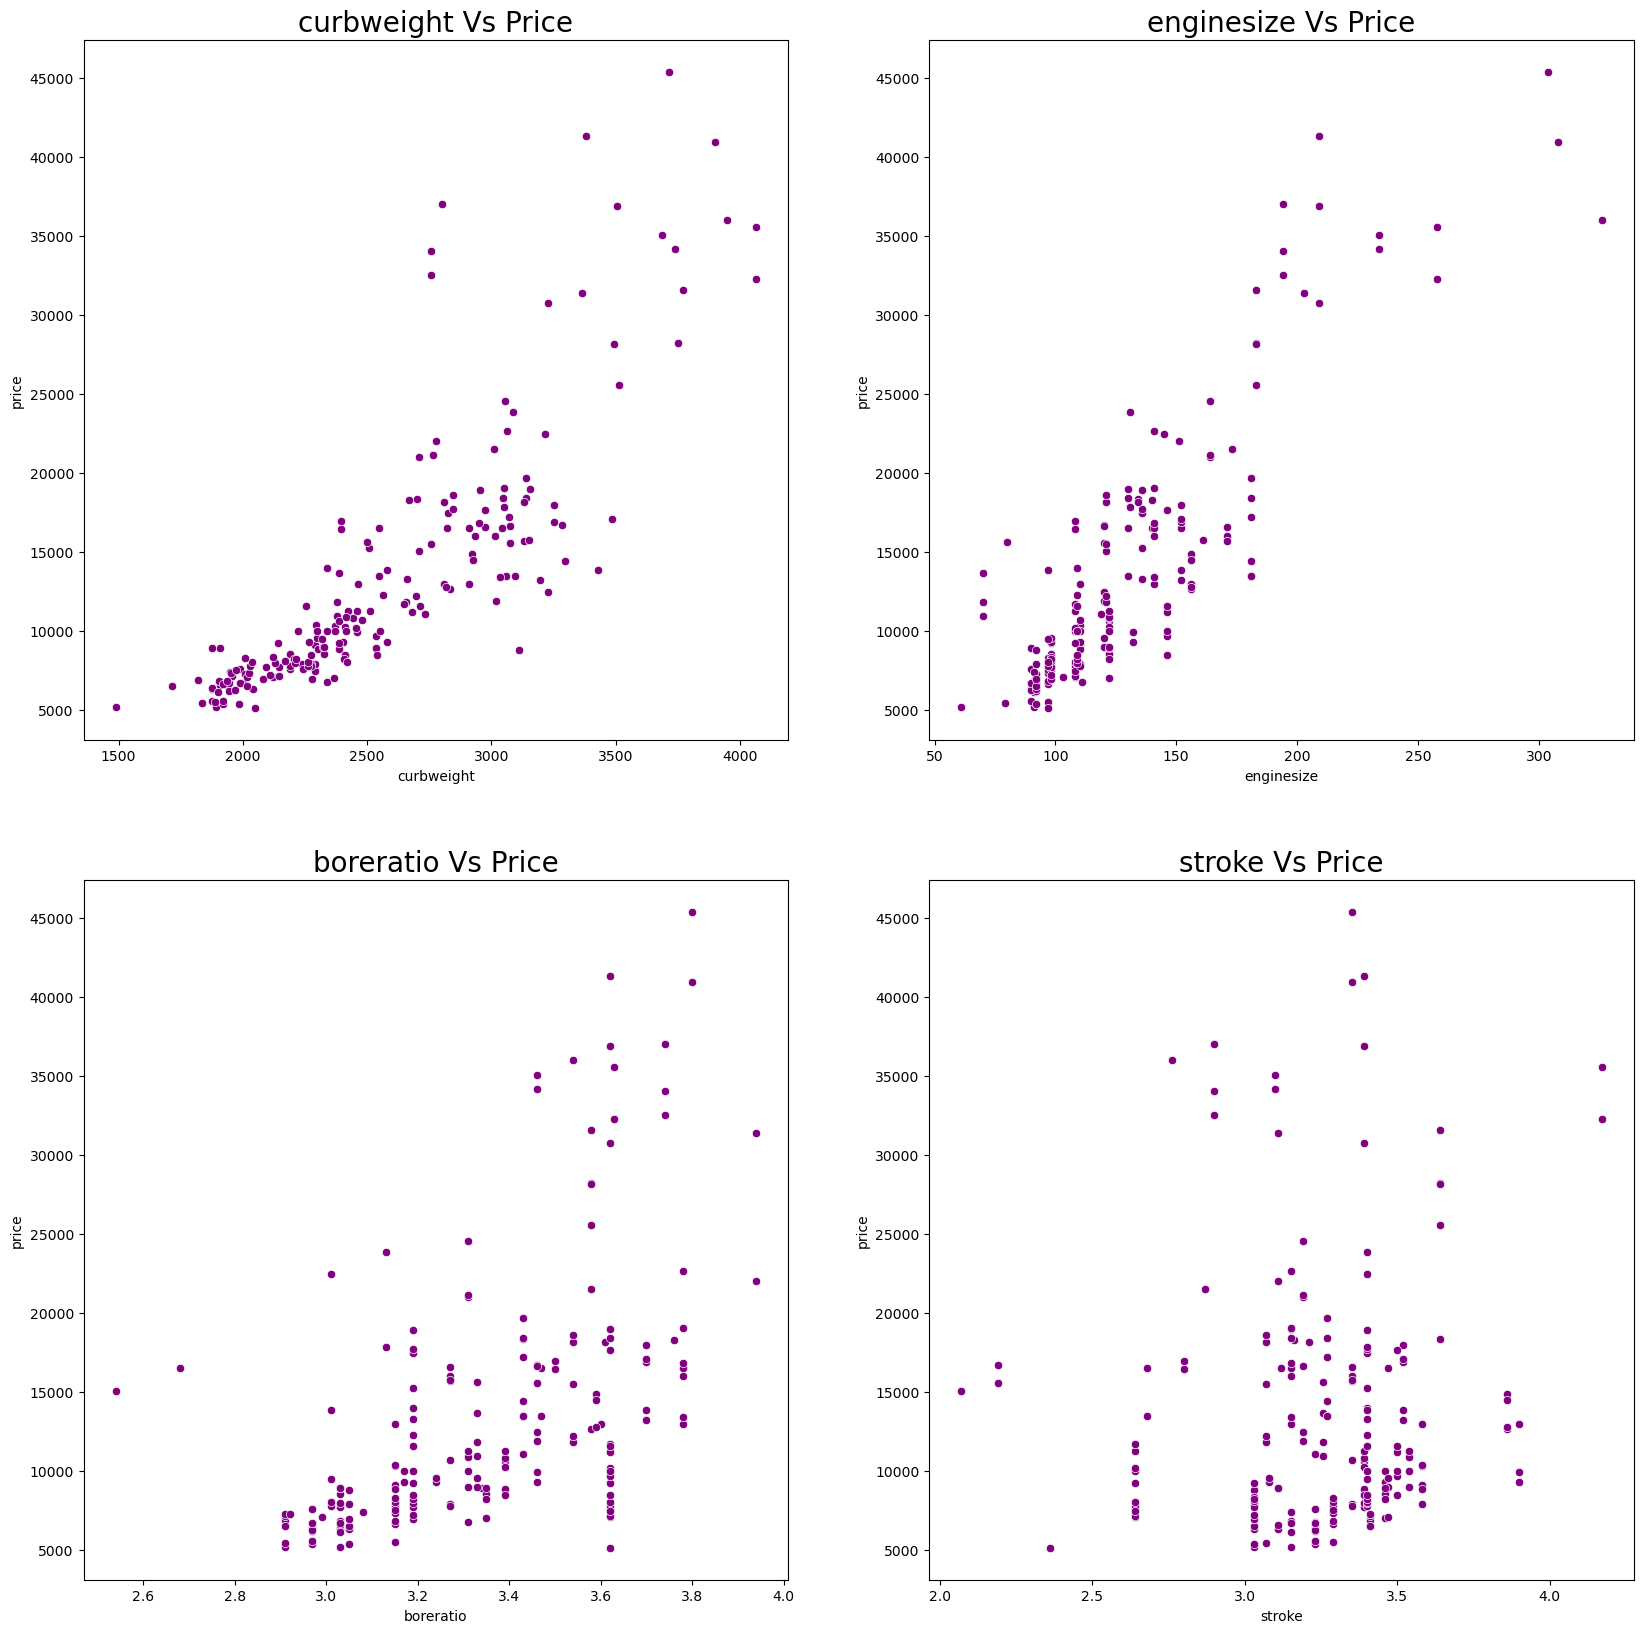

In [47]:
f = plt.figure(figsize=(20,20))

ax=f.add_subplot(221)
sns.scatterplot(x=df['curbweight'],y=df['price'], c='purple', ax=ax)
ax.set_title('curbweight Vs Price', fontsize = 20)

ax=f.add_subplot(222)
sns.scatterplot(x=df['enginesize'],y=df['price'], c='purple', ax=ax)
ax.set_title('enginesize Vs Price', fontsize = 20)

ax=f.add_subplot(223)
sns.scatterplot(x=df['boreratio'],y=df['price'], c='purple', ax=ax)
ax.set_title('boreratio Vs Price', fontsize = 20)

ax=f.add_subplot(224)
sns.scatterplot(x=df['stroke'],y=df['price'], c='purple', ax=ax)
ax.set_title('stroke Vs Price', fontsize = 20)

plt.show()


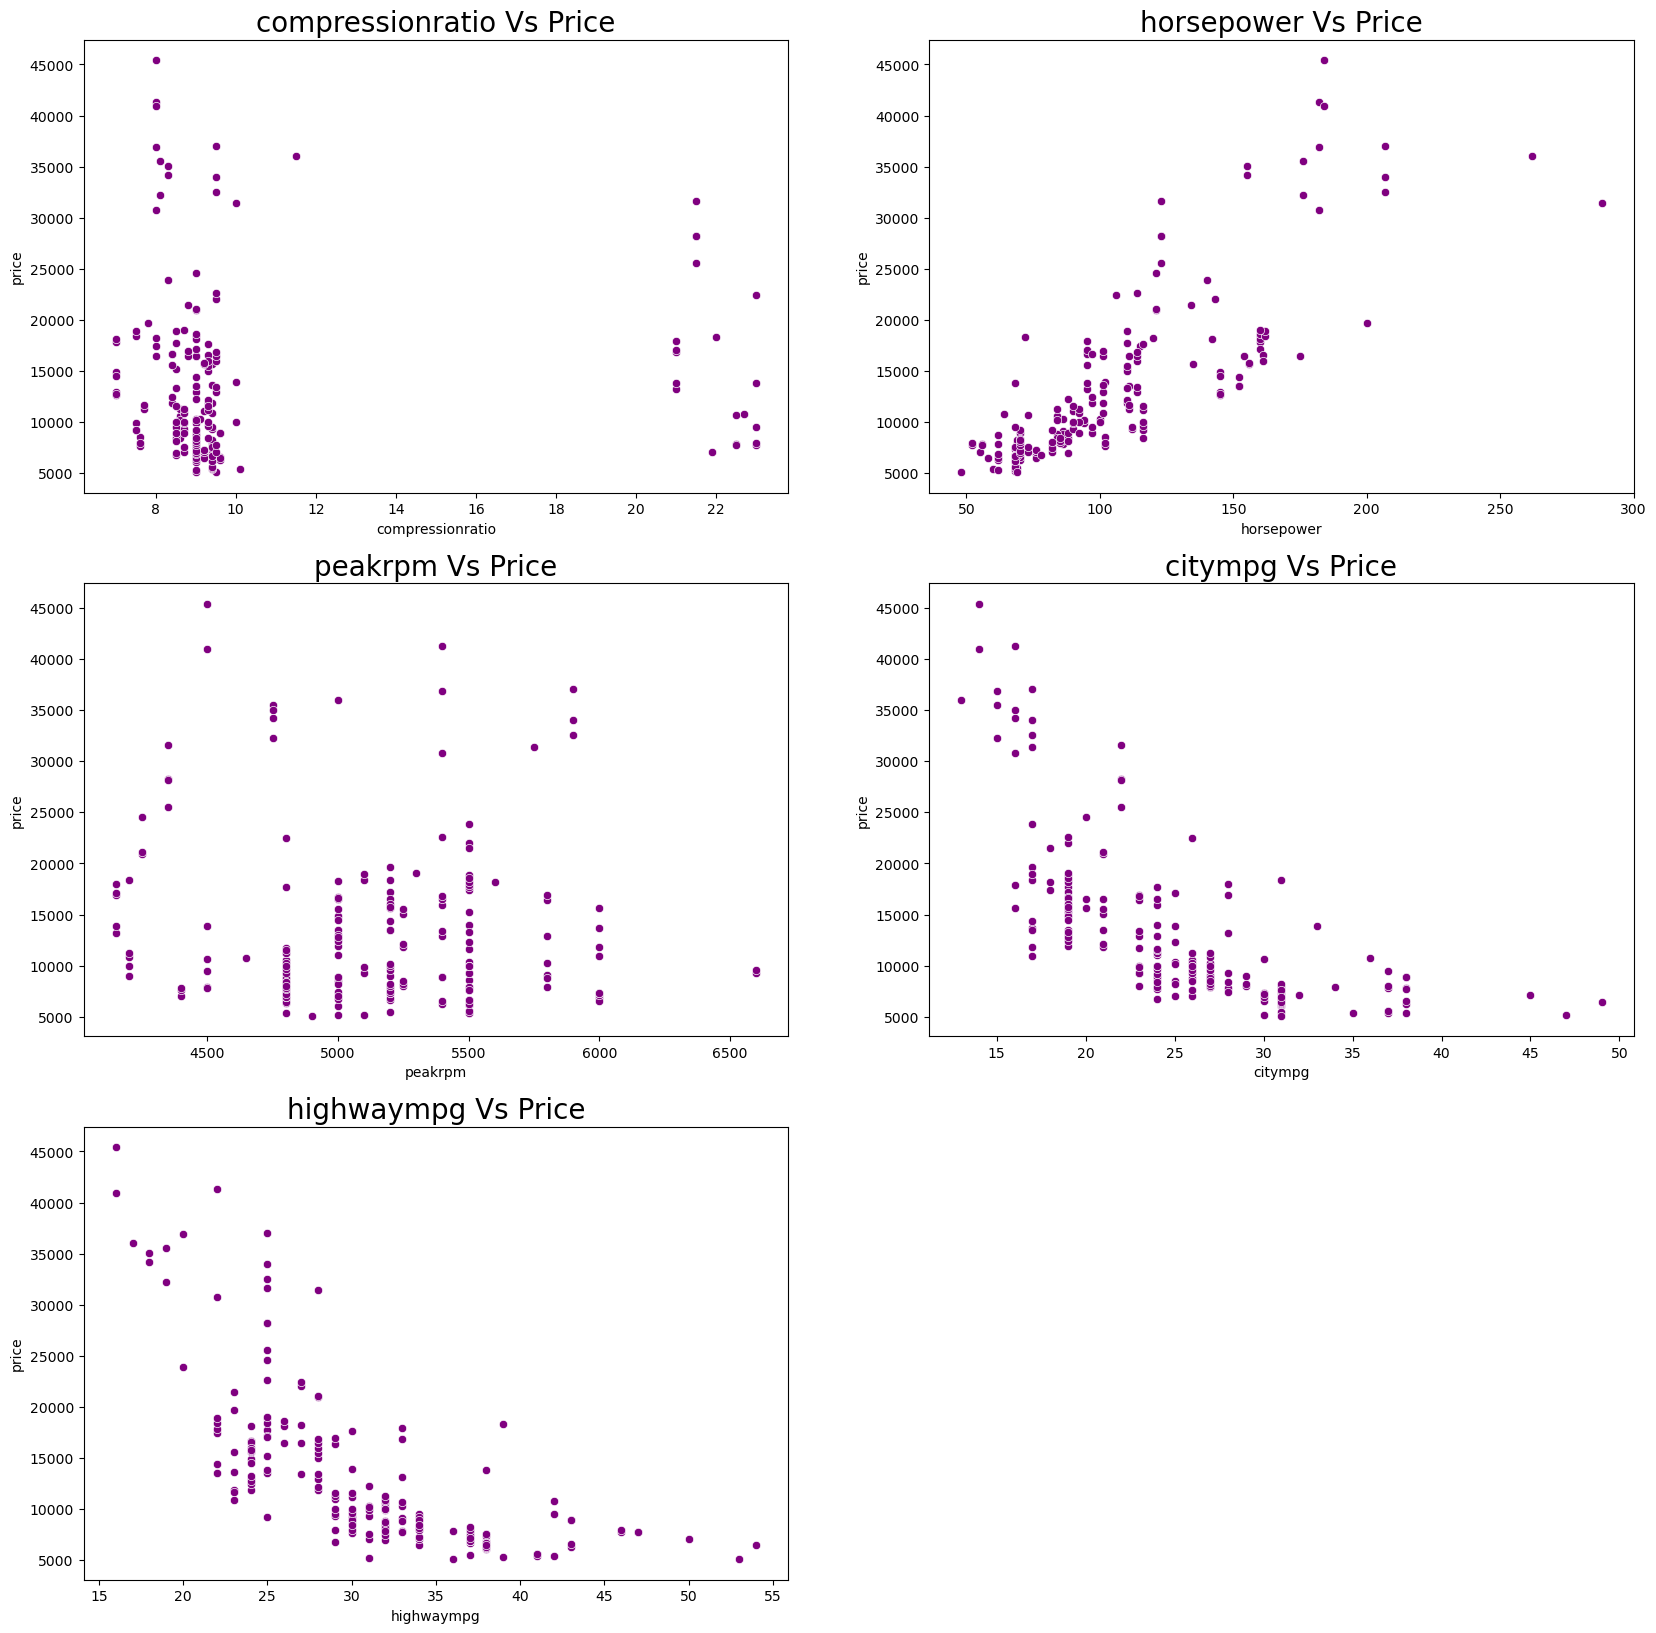

In [48]:
f = plt.figure(figsize=(20,20))

ax=f.add_subplot(321)
sns.scatterplot(x=df['compressionratio'],y=df['price'], c='purple', ax=ax)
ax.set_title('compressionratio Vs Price', fontsize = 20)

ax=f.add_subplot(322)
sns.scatterplot(x=df['horsepower'],y=df['price'], c='purple', ax=ax)
ax.set_title('horsepower Vs Price', fontsize = 20)

ax=f.add_subplot(323)
sns.scatterplot(x=df['peakrpm'],y=df['price'], c='purple', ax=ax)
ax.set_title('peakrpm Vs Price', fontsize = 20)

ax=f.add_subplot(324)
sns.scatterplot(x=df['citympg'],y=df['price'], c='purple', ax=ax)
ax.set_title('citympg Vs Price', fontsize = 20)

ax=f.add_subplot(325)
sns.scatterplot(x=df['highwaympg'],y=df['price'], c='purple')
ax.set_title('highwaympg Vs Price', fontsize = 20)

plt.show()

# Wheel base Vs Price

c:\Users\SOHAM PORIA\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


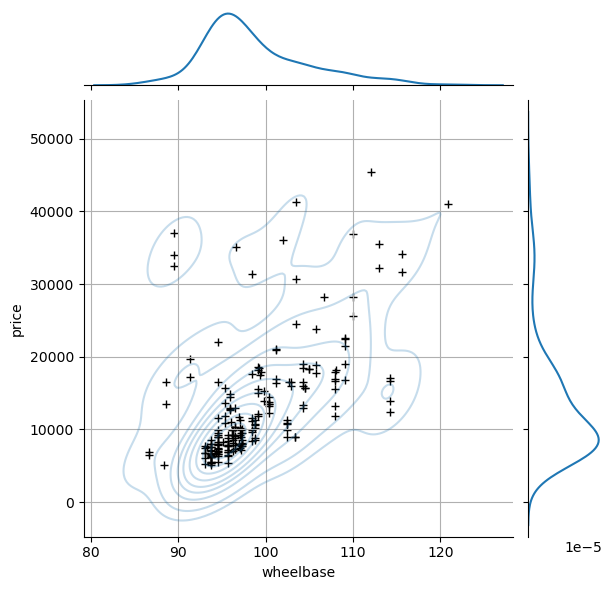

In [49]:
g = sns.jointplot(x ='wheelbase', y = 'price', data = df, kind= 'kde', c='b')
g.plot_joint(plt.scatter, c = 'k', s = 30, linewidth=1, marker = '+')
g.ax_joint.collections[0].set_alpha(0.25)
#g.set_axis_labels('wheel base', 'price')
plt.grid()
plt.show()

#  Carlength vs Car price

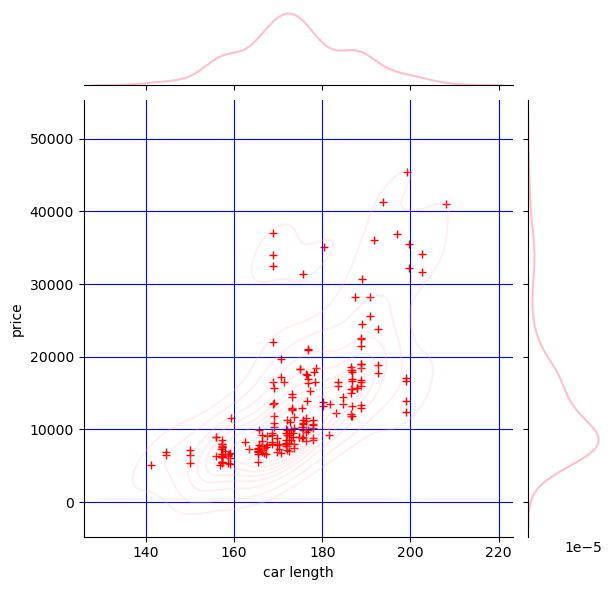

In [50]:
g = sns.jointplot(x="carlength", y="price", data=df, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0.25)
g.set_axis_labels("car length", "price");
plt.grid(c='b')
plt.show()

# Car width Vs Price

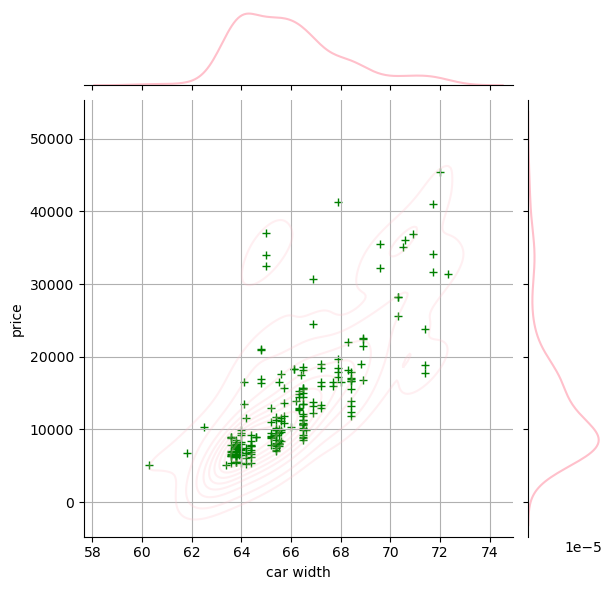

In [51]:
g = sns.jointplot(x="carwidth", y="price", data=df, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="green", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0.25)
g.set_axis_labels("car width", "price");
plt.grid()
plt.show()

# Car length vs Car width

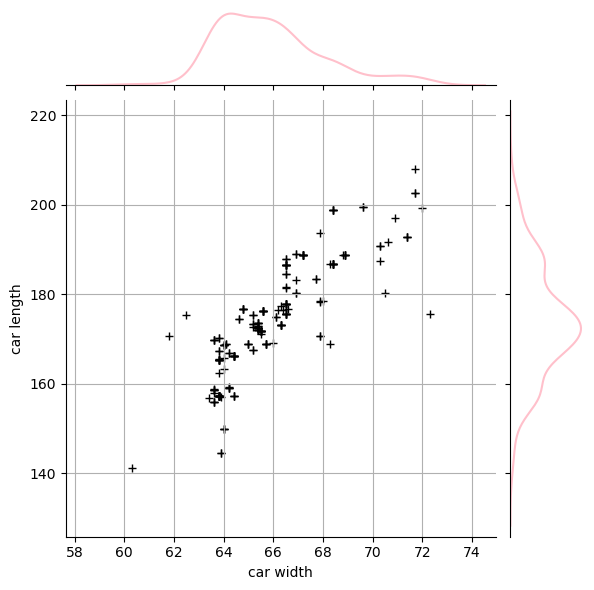

In [52]:
g = sns.jointplot(x="carwidth", y="carlength", data=df, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "car length");
plt.grid()
plt.show()

# Curbweight vs Price

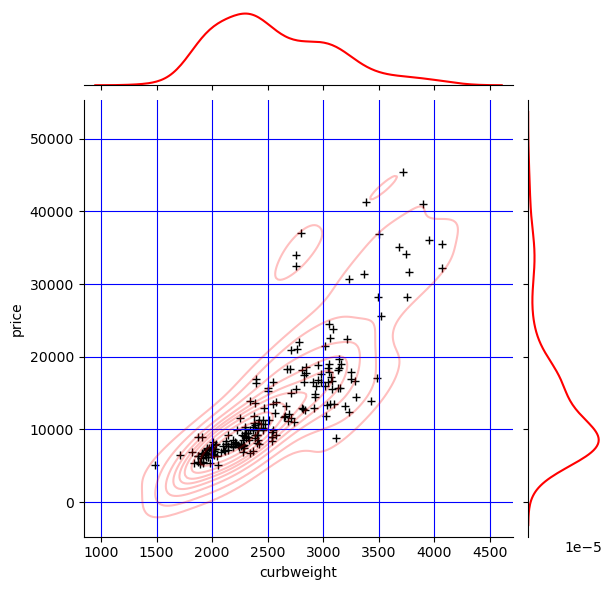

In [53]:
g = sns.jointplot(x="curbweight", y="price", data=df, kind="kde", color="r")
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0.25)
g.set_axis_labels("curbweight", "price");
plt.grid(c='b')
plt.show()

# Engine size Vs Price

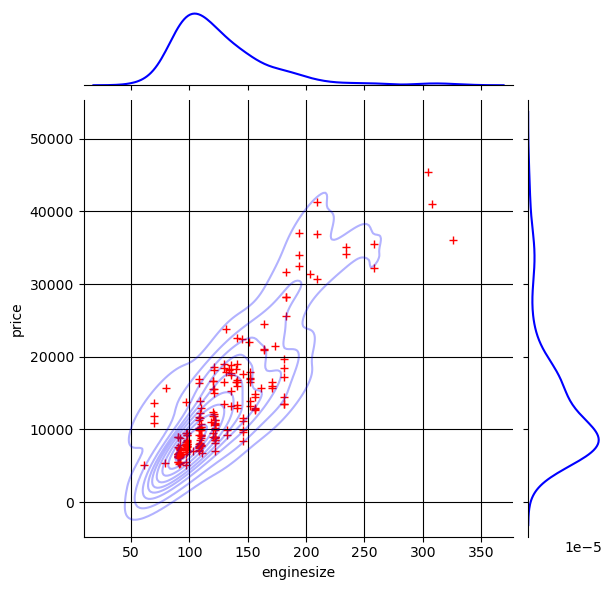

In [55]:
g = sns.jointplot(x="enginesize", y="price", data=df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0.30)
plt.grid(c='k')
g.set_axis_labels("enginesize", "price");

# Horse power vs Price

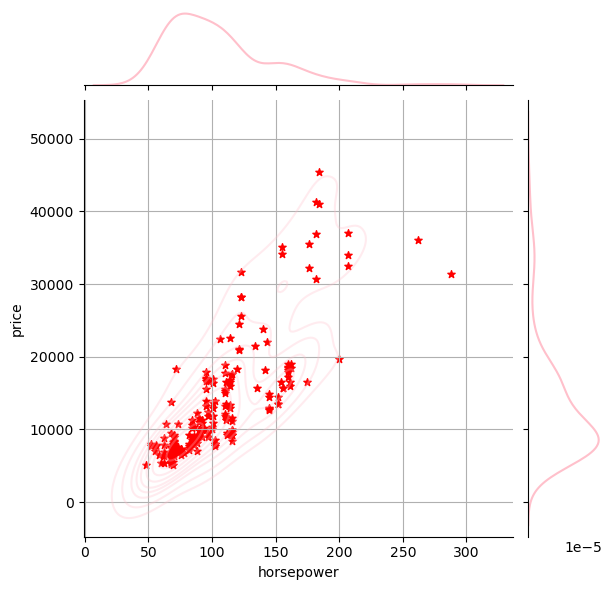

In [56]:
g = sns.jointplot(x="horsepower", y="price", data=df, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0.30)
plt.grid()
g.set_axis_labels("horsepower", "price");
                

# Citympg vs Price

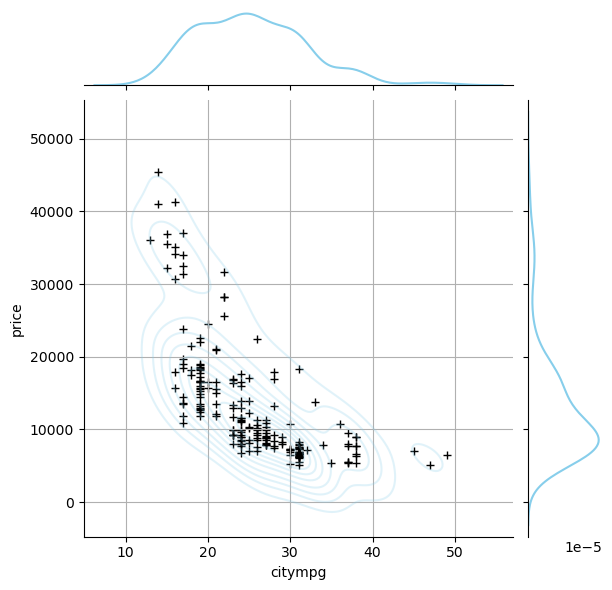

In [57]:
g = sns.jointplot(x="citympg", y="price", data=df, kind="kde", color="skyblue")
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0.25)
plt.grid()
g.set_axis_labels("citympg", "price");

# Highwaympg vs Price

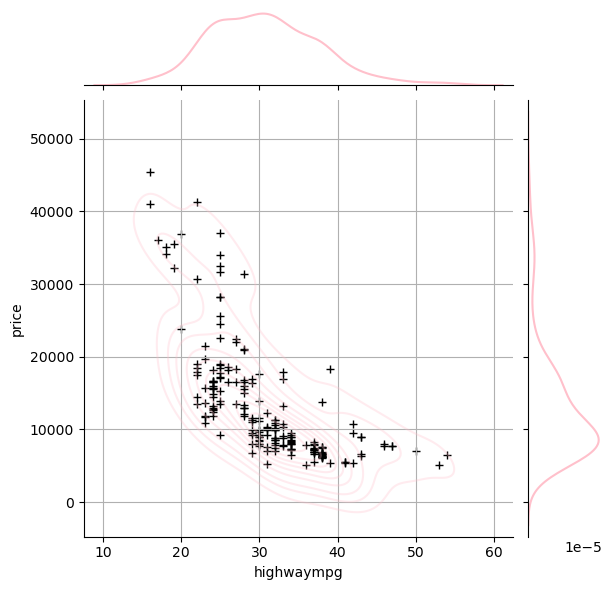

In [58]:
g = sns.jointplot(x="highwaympg", y="price", data=df, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0.30)
plt.grid()
g.set_axis_labels("highwaympg", "price");

# Pairplot of all numerical features

In [59]:
num_cols = df.select_dtypes(exclude=['object'])

num_cols

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               9.0         111     5000       21   
1         3.47    2.68               9.0         111     5000       21   
2         2.68    3.47               9.0         154     5000       19   
3         3.19    3.40              10.0         102     5500       24   
4         3.19    3.40               8.0         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg    price  
0            27  13495.0  
1            27  16500.0  
2            26  16500.0  
3            30  13950.0  
4            22  17450.0  
..          ...      ...  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[205 rows x 14 columns]

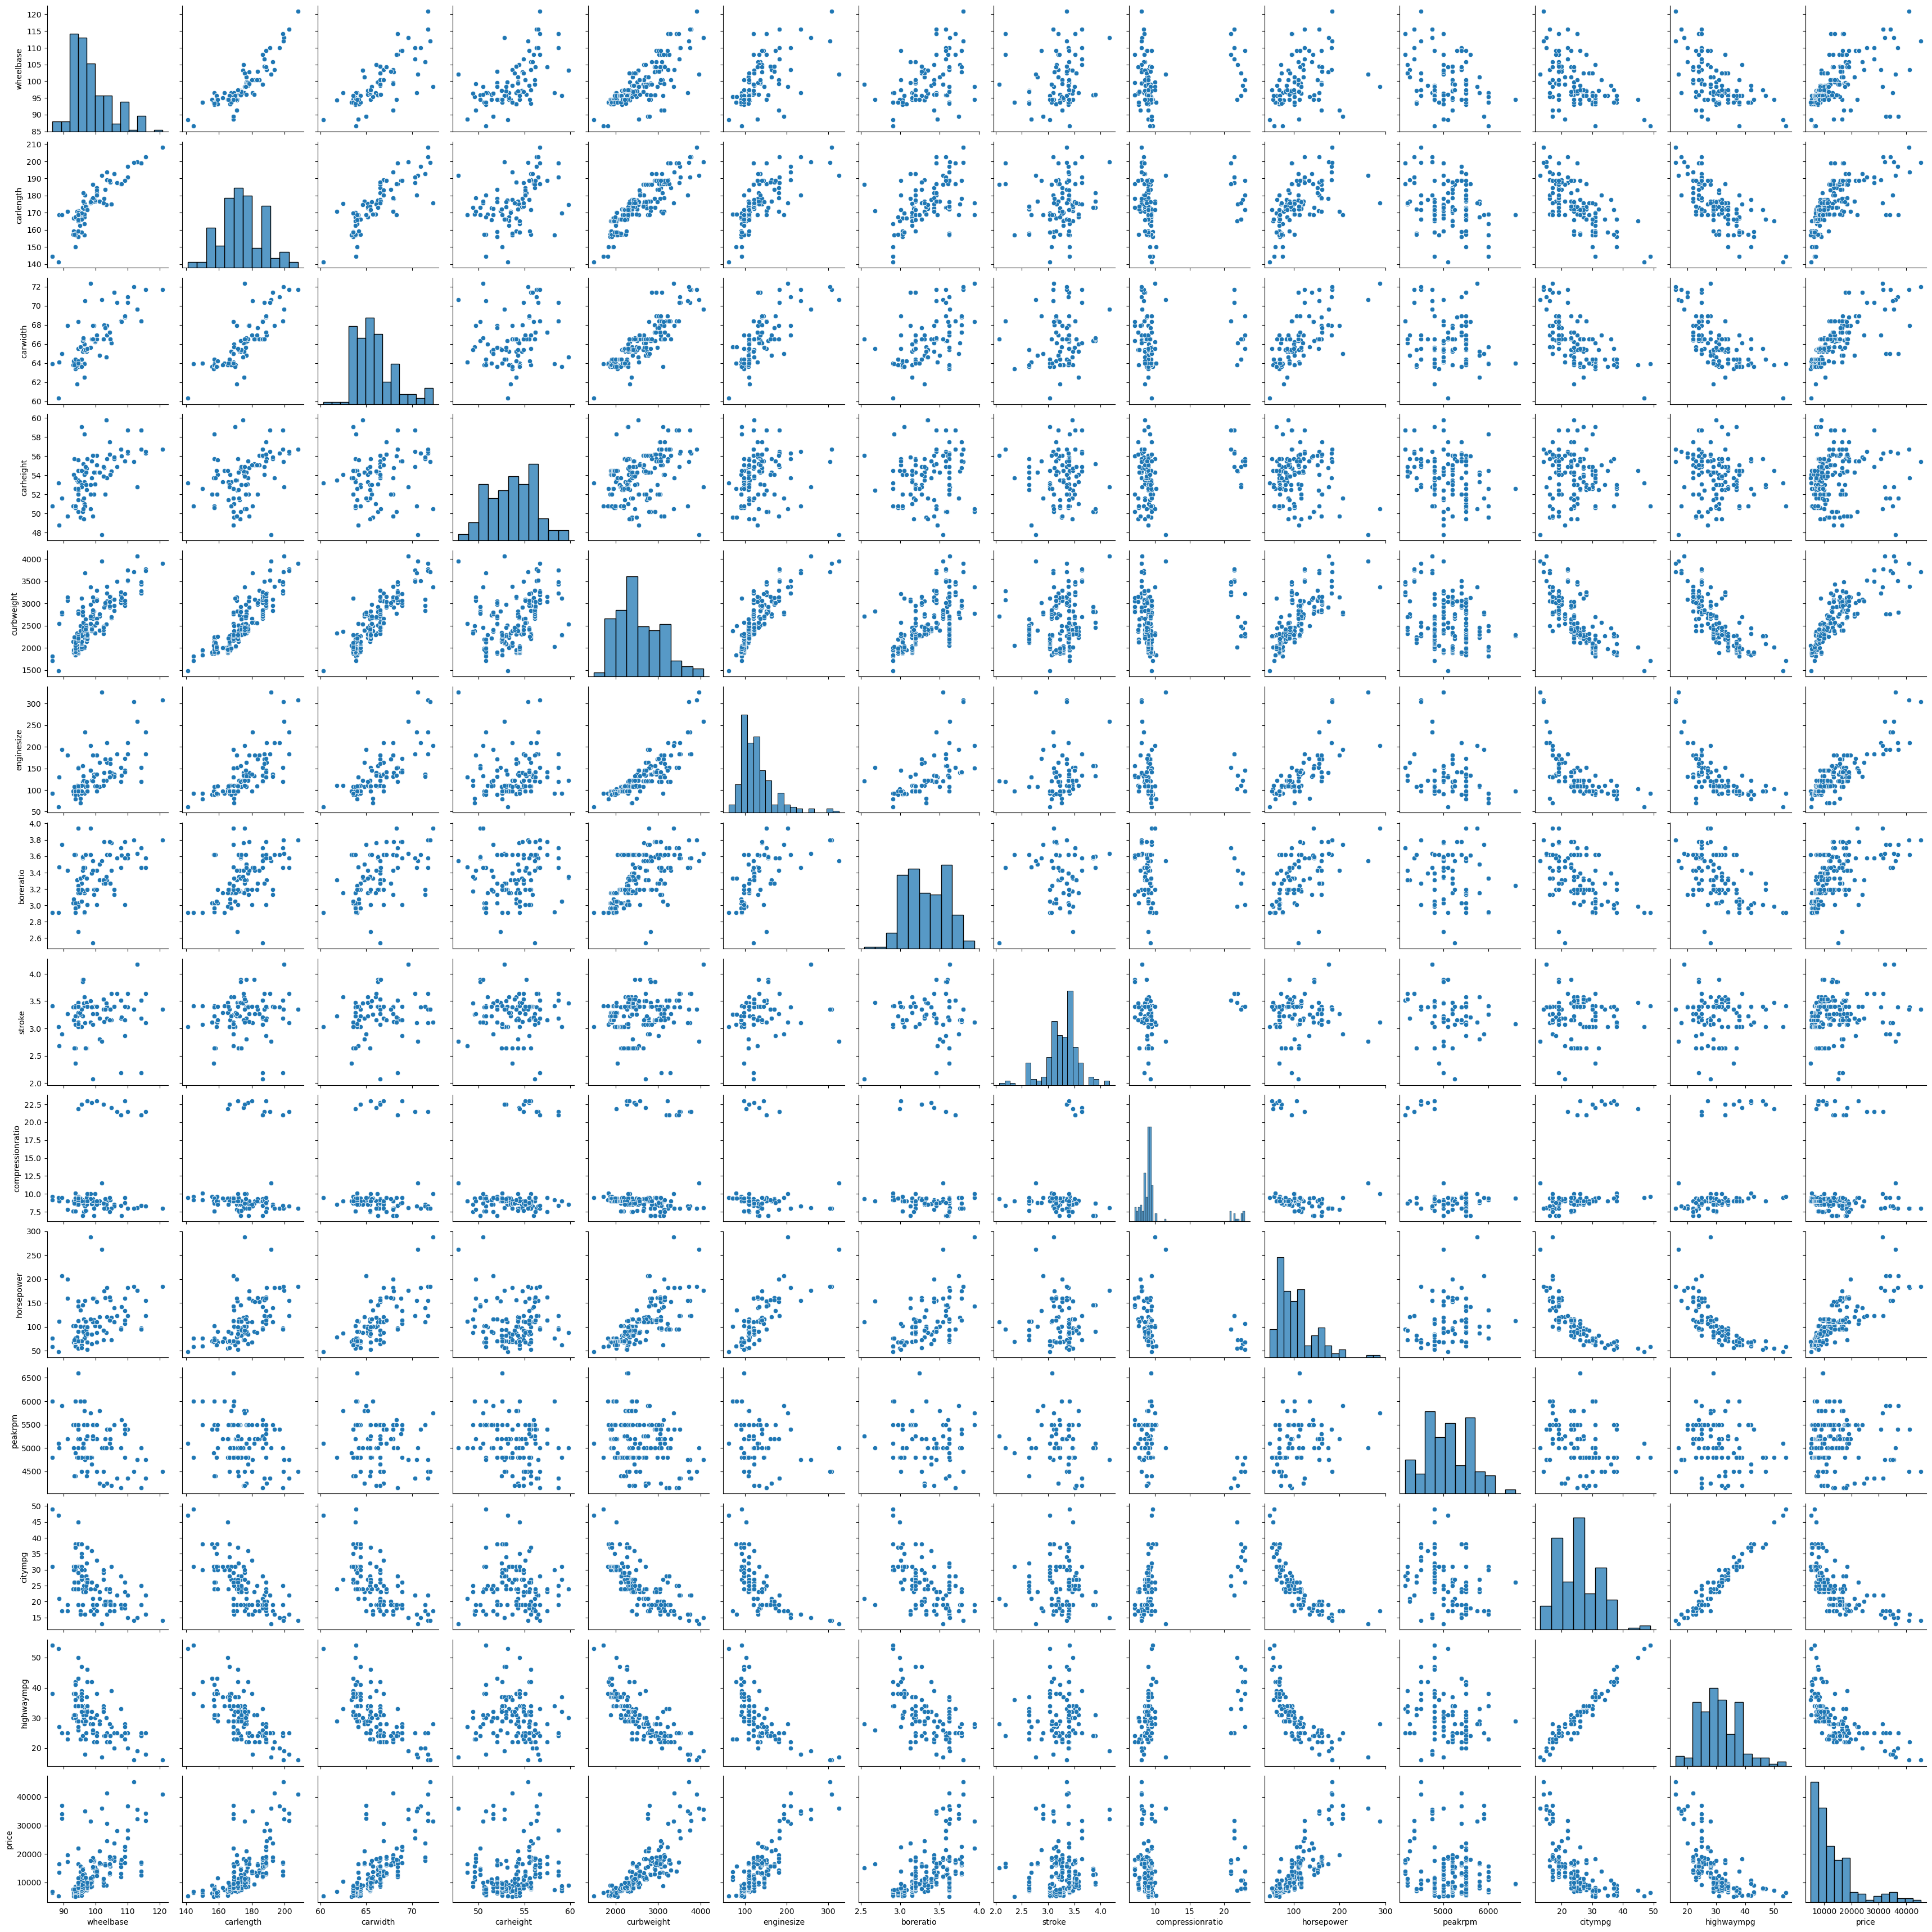

In [60]:
sns.pairplot(data= num_cols)
plt.show()

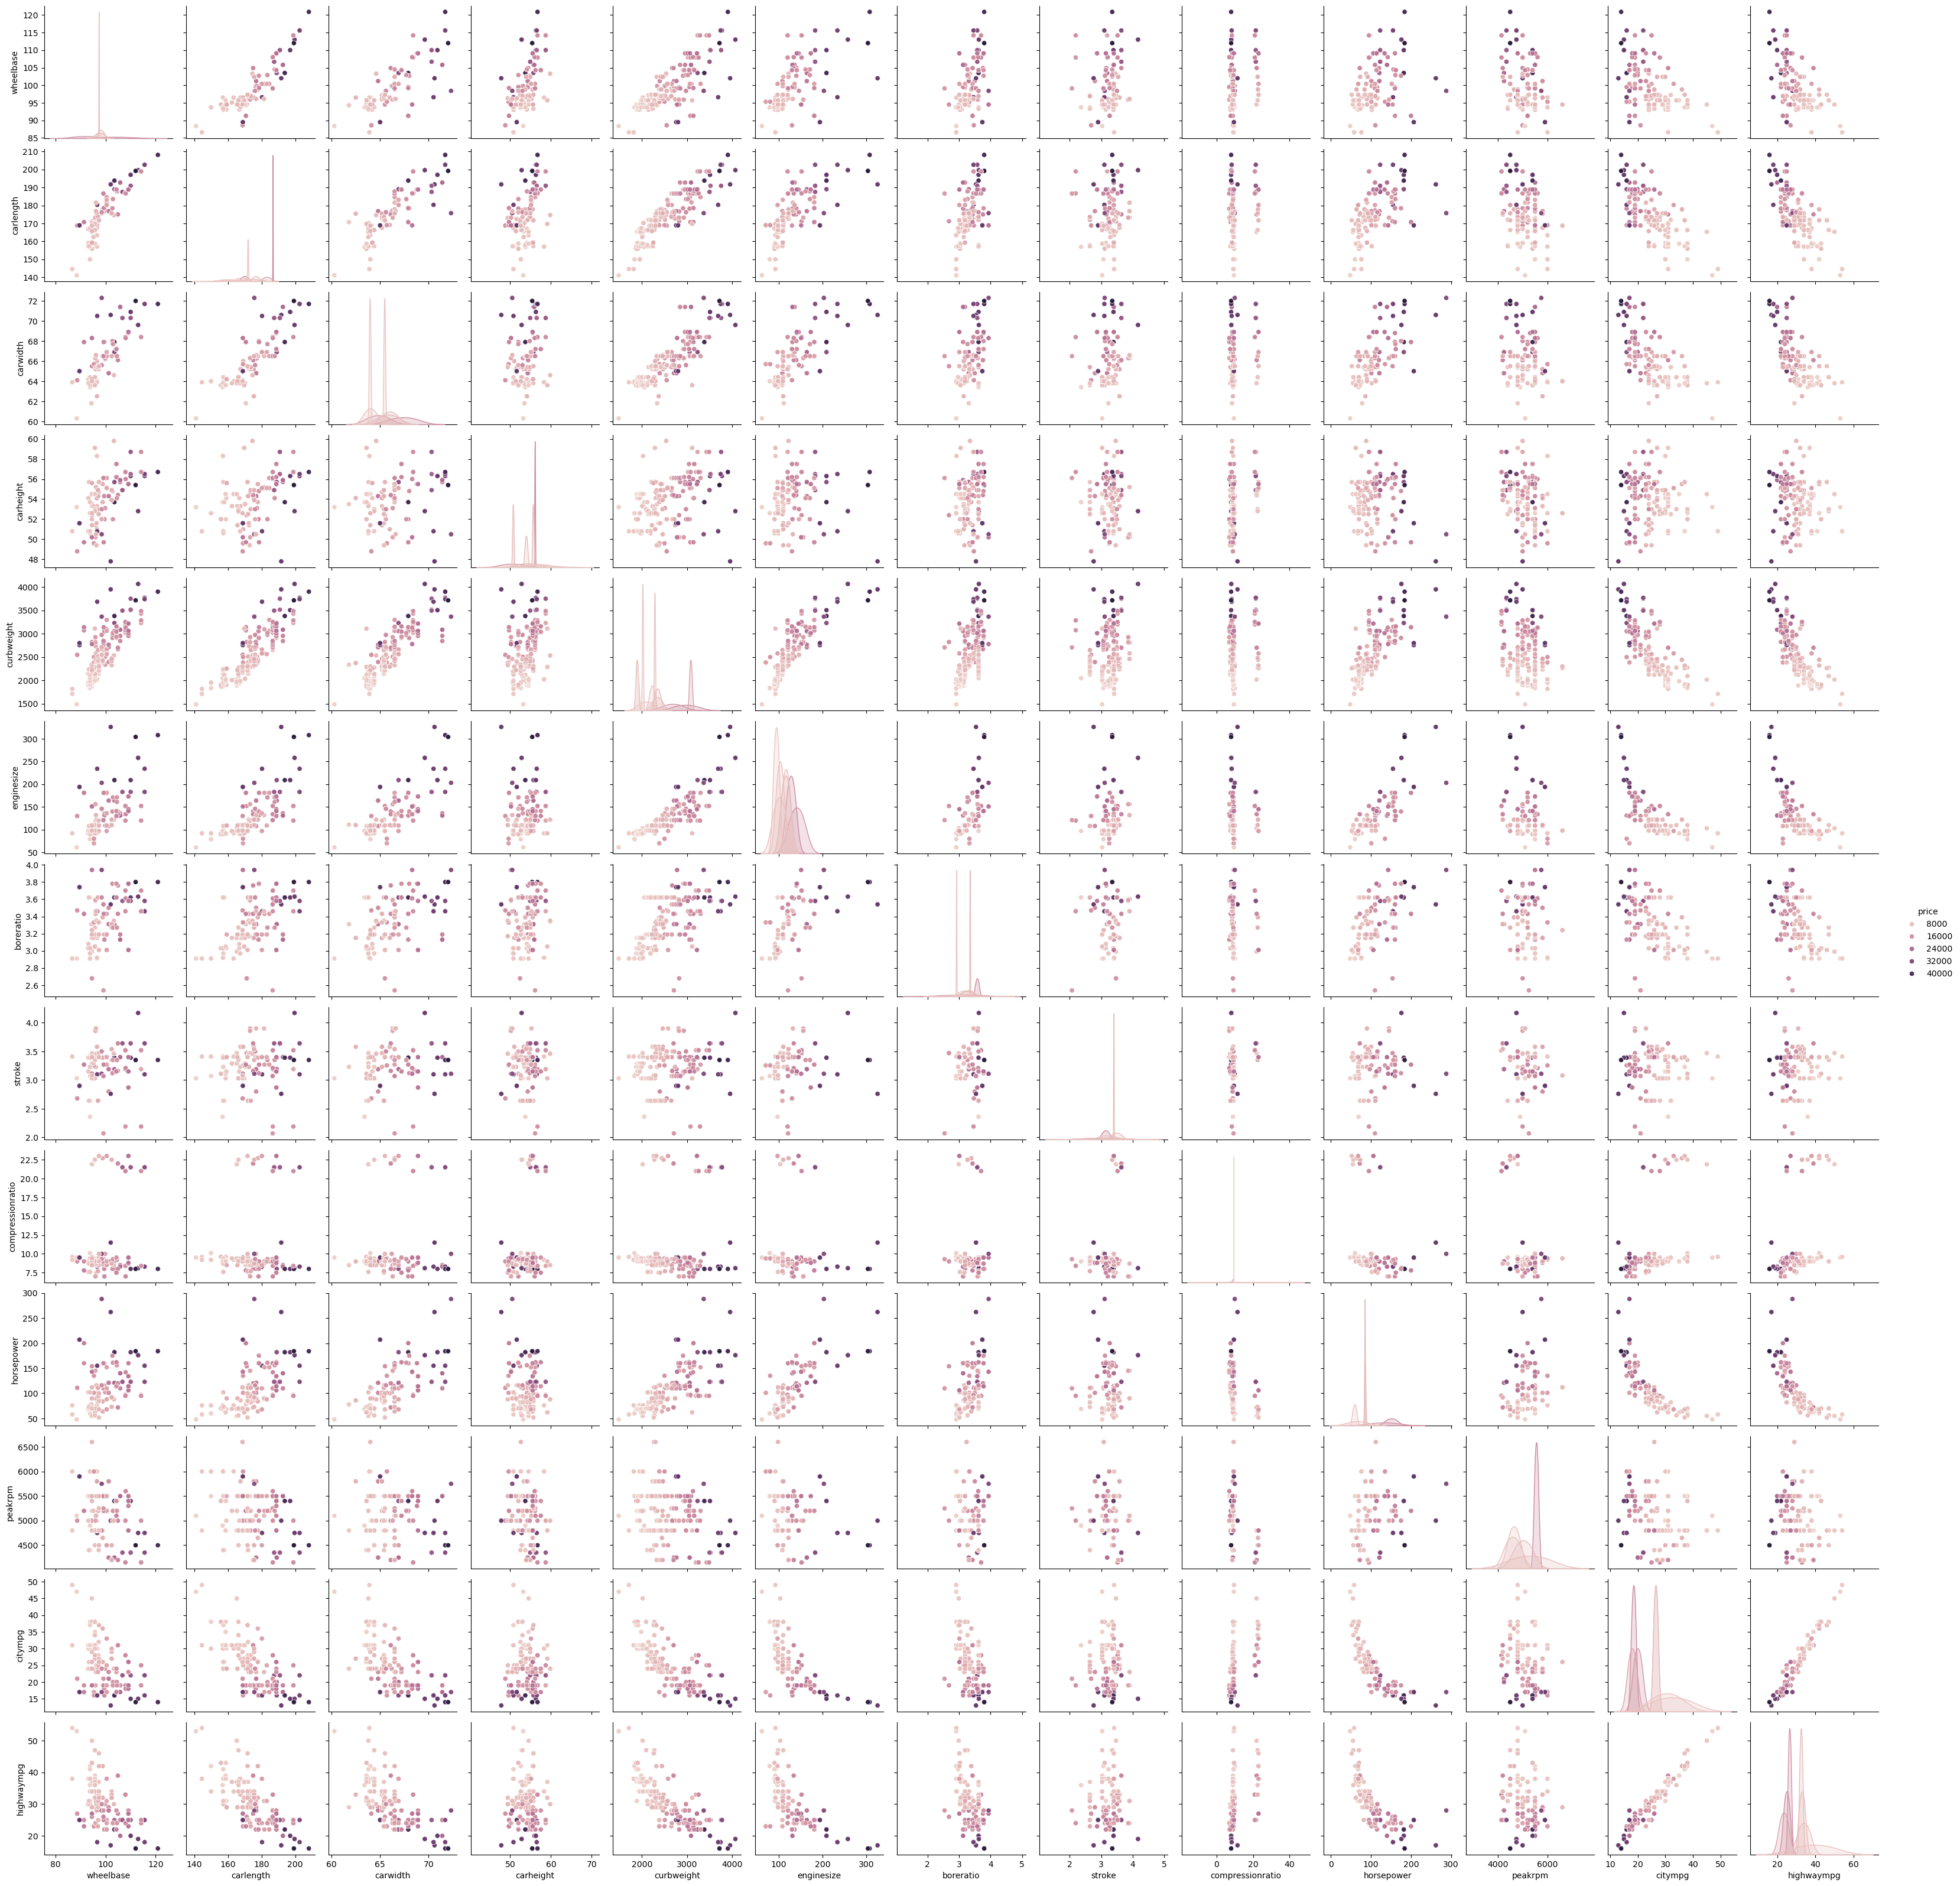

In [61]:
sns.pairplot(data= num_cols, hue= 'price')
plt.show()

# Correlation Matrix

In [62]:
num_cols.corr()

wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase          1.000000   0.874587  0.795144   0.589435    0.776386   
carlength          0.874587   1.000000  0.841118   0.491029    0.877728   
carwidth           0.795144   0.841118  1.000000   0.279210    0.867032   
carheight          0.589435   0.491029  0.279210   1.000000    0.295572   
curbweight         0.776386   0.877728  0.867032   0.295572    1.000000   
enginesize         0.569329   0.683360  0.735433   0.067149    0.850594   
boreratio          0.488750   0.606454  0.559150   0.171071    0.648480   
stroke             0.160959   0.129533  0.182942  -0.055307    0.168790   
compressionratio   0.249786   0.158414  0.181129   0.261214    0.151362   
horsepower         0.353294   0.552623  0.640732  -0.108802    0.750739   
peakrpm           -0.360469  -0.287242 -0.220012  -0.320411   -0.266243   
citympg           -0.470414  -0.670909 -0.642704  -0.048640   -0.757414   
highwaympg        -0.544082  -0.704662 -0.677218  -0.107358   -0.797465   
price              0.577816   0.682920  0.759325   0.119336    0.835305   

                  enginesize  boreratio    stroke  compressionratio  \
wheelbase           0.569329   0.488750  0.160959          0.249786   
carlength           0.683360   0.606454  0.129533          0.158414   
carwidth            0.735433   0.559150  0.182942          0.181129   
carheight           0.067149   0.171071 -0.055307          0.261214   
curbweight          0.850594   0.648480  0.168790          0.151362   
enginesize          1.000000   0.583774  0.203129          0.028971   
boreratio           0.583774   1.000000 -0.055909          0.005197   
stroke              0.203129  -0.055909  1.000000          0.186110   
compressionratio    0.028971   0.005197  0.186110          1.000000   
horsepower          0.809769   0.573677  0.080940         -0.204326   
peakrpm            -0.244660  -0.254976 -0.067964         -0.435741   
citympg            -0.653658  -0.584532 -0.042145          0.324701   
highwaympg         -0.677470  -0.587012 -0.043931          0.265201   
price               0.874145   0.553173  0.079443          0.067984   

                  horsepower   peakrpm   citympg  highwaympg     price  
wheelbase           0.353294 -0.360469 -0.470414   -0.544082  0.577816  
carlength           0.552623 -0.287242 -0.670909   -0.704662  0.682920  
carwidth            0.640732 -0.220012 -0.642704   -0.677218  0.759325  
carheight          -0.108802 -0.320411 -0.048640   -0.107358  0.119336  
curbweight          0.750739 -0.266243 -0.757414   -0.797465  0.835305  
enginesize          0.809769 -0.244660 -0.653658   -0.677470  0.874145  
boreratio           0.573677 -0.254976 -0.584532   -0.587012  0.553173  
stroke              0.080940 -0.067964 -0.042145   -0.043931  0.079443  
compressionratio   -0.204326 -0.435741  0.324701    0.265201  0.067984  
horsepower          1.000000  0.131073 -0.801456   -0.770544  0.808139  
peakrpm             0.131073  1.000000 -0.113544   -0.054275 -0.085267  
citympg            -0.801456 -0.113544  1.000000    0.971337 -0.685751  
highwaympg         -0.770544 -0.054275  0.971337    1.000000 -0.697599  
price               0.808139 -0.085267 -0.685751   -0.697599  1.000000

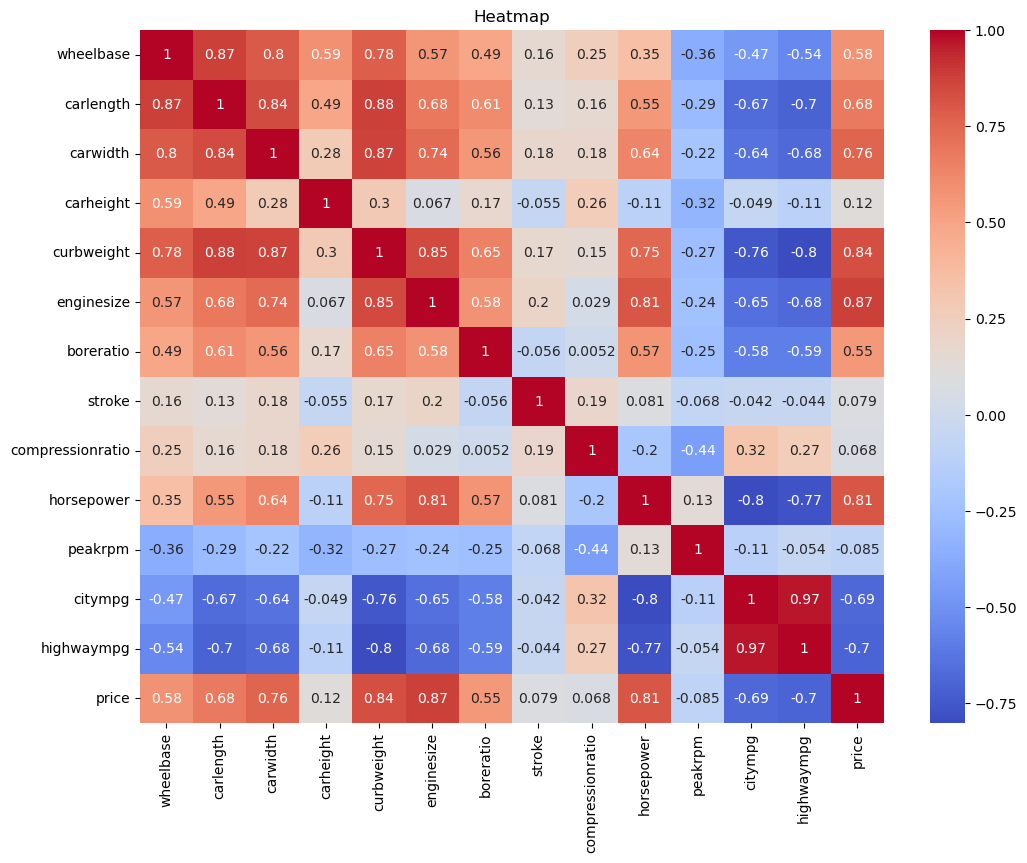

In [63]:
plt.figure(figsize=(12,9))
sns.heatmap(num_cols.corr(), annot =True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

# highly correlated Columns

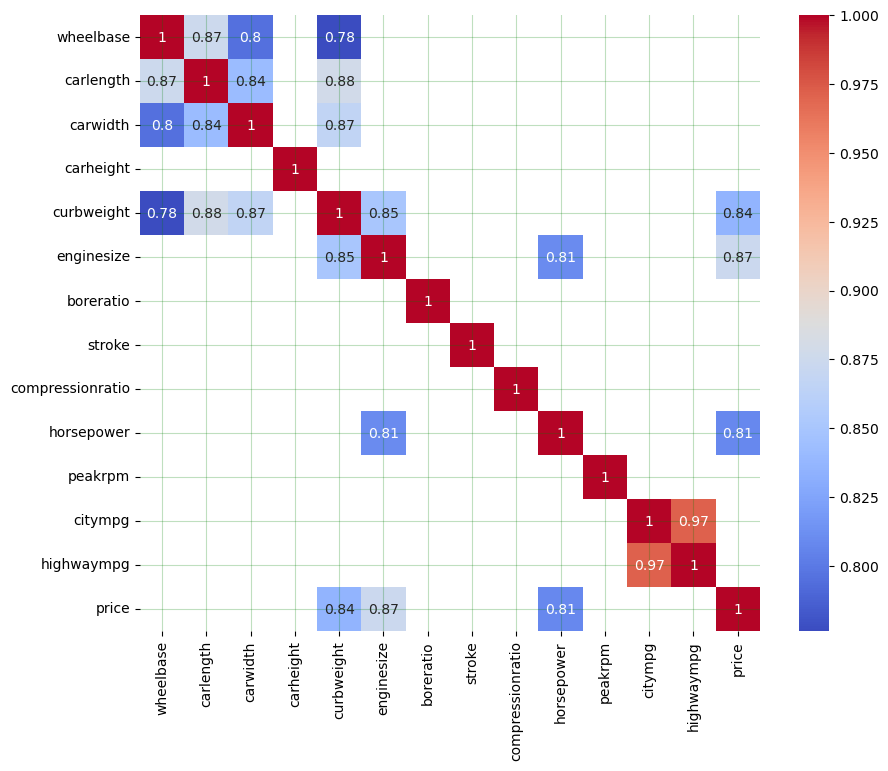

In [64]:
kot = num_cols.corr()[num_cols.corr() >= 0.77]
plt.figure(figsize=(10,8))
sns.heatmap(kot,annot=True, cmap= 'coolwarm')
plt.grid(c = 'green', alpha= 0.25)
plt.show()

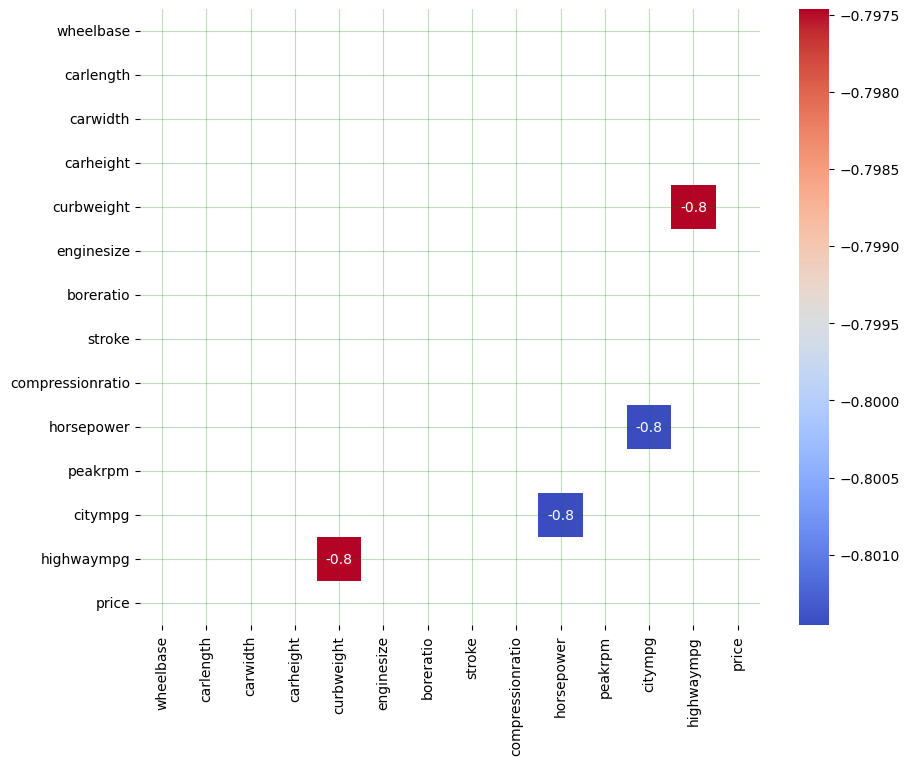

In [65]:
kot1c = num_cols.corr()[num_cols.corr() <= (-0.78)]
plt.figure(figsize=(10,8))
sns.heatmap(kot1c,annot=True, cmap= 'coolwarm')
plt.grid(c = 'green', alpha= 0.25)

plt.show()

1.wheelbase has high positive correlation with carlength,carwidth and curbweight

2.carlength has high postive correlation with curbweight and carwidth

3.carwidth has high postive correlation with curbweight

4.curbweight has high postive correlation with price and enginesize, negative correlation with highwaympg

5.enginesize has high positive correlation with price and horsepower

6.horsepower has high positive correlation with price, negative correlation with citympg

7.citympg and highwaympg are highly correlated


# Creating New Columns using those columns which are Highly Correlated

In [66]:
df['car_wh_len']= df['carlength'] * df['wheelbase'] # combine wheelbase  and carlength

df['car_wh_width']= df['carlength'] * df['wheelbase'] # combine wheelbase  and carwidth

df['car_wh_cur']= df['carlength'] * df['wheelbase'] # combine wheelbase  and curbweight

df['car_len_cur']= df['carlength'] * df['curbweight'] # combine carlength  and curbweight

df['car_len_wdh']= df['carlength'] * df['carwidth'] # combine carlength  and carwidth

df['car_wdh_cur']= df['carwidth'] * df['curbweight'] # combine carwidth  and curbweight

df['car_cur_price']= df['curbweight'] * df['price'] # combine curbweight  and price

df['car_cur_eng']= df['curbweight'] * df['enginesize'] # combine curbweight  and enginesize

df['car_cur_high']= df['curbweight'] * df['highwaympg'] # combine curbweight  and highwaympg

df['car_eng_price']= df['enginesize'] * df['price'] # combine enginesize  and price

df['car_eng_hp']= df['enginesize'] * df['horsepower'] # combine enginesize  and horsepower

df['car_hp_price']= df['horsepower'] * df['price'] # combine horsepower  and price

df['car_hp_city']= df['horsepower'] * df['citympg'] # combine horsepower  and citympg

df['car_city_hw']= df['citympg'] * df['highwaympg'] # combine citympg  and highwaympg

cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','highwaympg','horsepower','citympg']

df.drop(columns = cols, inplace=True)


In [67]:
df.shape

(205, 31)

In [68]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carheight', 'enginetype',
       'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'price', 'car_wh_len', 'car_wh_width',
       'car_wh_cur', 'car_len_cur', 'car_len_wdh', 'car_wdh_cur',
       'car_cur_price', 'car_cur_eng', 'car_cur_high', 'car_eng_price',
       'car_eng_hp', 'car_hp_price', 'car_hp_city', 'car_city_hw'],
      dtype='object')

In [69]:
nc = df.select_dtypes(exclude='object')
nc.corr()

carheight  boreratio    stroke  compressionratio   peakrpm  \
carheight          1.000000   0.171071 -0.055307          0.261214 -0.320411   
boreratio          0.171071   1.000000 -0.055909          0.005197 -0.254976   
stroke            -0.055307  -0.055909  1.000000          0.186110 -0.067964   
compressionratio   0.261214   0.005197  0.186110          1.000000 -0.435741   
peakrpm           -0.320411  -0.254976 -0.067964         -0.435741  1.000000   
price              0.119336   0.553173  0.079443          0.067984 -0.085267   
car_wh_len         0.552814   0.564150  0.148302          0.208879 -0.331760   
car_wh_width       0.552814   0.564150  0.148302          0.208879 -0.331760   
car_wh_cur         0.552814   0.564150  0.148302          0.208879 -0.331760   
car_len_cur        0.355814   0.639758  0.165529          0.160820 -0.280438   
car_len_wdh        0.440987   0.607996  0.151343          0.172784 -0.276290   
car_wdh_cur        0.295973   0.639957  0.173703          0.160766 -0.265264   
car_cur_price      0.145342   0.546643  0.115290          0.088751 -0.145034   
car_cur_eng        0.123935   0.577341  0.195559          0.070944 -0.252394   
car_cur_high       0.302452   0.028036  0.172234          0.715679 -0.483511   
car_eng_price      0.061346   0.498964  0.106418          0.030588 -0.138024   
car_eng_hp        -0.070426   0.537792  0.108057         -0.093672 -0.040430   
car_hp_price      -0.014004   0.527660  0.044978         -0.047075  0.016558   
car_hp_city       -0.199586   0.397323  0.132770         -0.015946  0.108484   
car_city_hw       -0.090419  -0.579178 -0.038327          0.303493 -0.087750   

                     price  car_wh_len  car_wh_width  car_wh_cur  car_len_cur  \
carheight         0.119336    0.552814      0.552814    0.552814     0.355814   
boreratio         0.553173    0.564150      0.564150    0.564150     0.639758   
stroke            0.079443    0.148302      0.148302    0.148302     0.165529   
compressionratio  0.067984    0.208879      0.208879    0.208879     0.160820   
peakrpm          -0.085267   -0.331760     -0.331760   -0.331760    -0.280438   
price             1.000000    0.660616      0.660616    0.660616     0.823832   
car_wh_len        0.660616    1.000000      1.000000    1.000000     0.911758   
car_wh_width      0.660616    1.000000      1.000000    1.000000     0.911758   
car_wh_cur        0.660616    1.000000      1.000000    1.000000     0.911758   
car_len_cur       0.823832    0.911758      0.911758    0.911758     1.000000   
car_len_wdh       0.738052    0.965455      0.965455    0.965455     0.946430   
car_wdh_cur       0.844032    0.870339      0.870339    0.870339     0.992244   
car_cur_price     0.985812    0.706925      0.706925    0.706925     0.865095   
car_cur_eng       0.888776    0.724481      0.724481    0.724481     0.894034   
car_cur_high     -0.053719    0.161258      0.161258    0.161258     0.106245   
car_eng_price     0.951264    0.605941      0.605941    0.605941     0.774174   
car_eng_hp        0.865173    0.520399      0.520399    0.520399     0.748109   
car_hp_price      0.951343    0.522391      0.522391    0.522391     0.732269   
car_hp_city       0.512813    0.179738      0.179738    0.179738     0.382043   
car_city_hw      -0.625488   -0.590815     -0.590815   -0.590815    -0.713453   

                  car_len_wdh  car_wdh_cur  car_cur_price  car_cur_eng  \
carheight            0.440987     0.295973       0.145342     0.123935   
boreratio            0.607996     0.639957       0.546643     0.577341   
stroke               0.151343     0.173703       0.115290     0.195559   
compressionratio     0.172784     0.160766       0.088751     0.070944   
peakrpm             -0.276290    -0.265264      -0.145034    -0.252394   
price                0.738052     0.844032       0.985812     0.888776   
car_wh_len           0.965455     0.870339       0.706925     0.724481   
car_wh_width         0.965455     0.870339 

# Feature Selection

In [70]:
df['C_name'] = df['CarName'].apply(lambda x:x.split()[0])
df['c_model'] = df['CarName'].apply(lambda x:x.split()[1:4])

# Encoding

In [71]:
le = LabelEncoder()


df['symboling'] = le.fit_transform(df['symboling'])

df['C_name'] = le.fit_transform(df['C_name'])

df['fueltype'] = le.fit_transform(df['fueltype'])

df['aspiration'] = le.fit_transform(df['aspiration'])

df['carbody'] = le.fit_transform(df['carbody'])

df['enginelocation'] = le.fit_transform(df['enginelocation'])

df['enginetype'] = le.fit_transform(df['enginetype'])


mapp11 = {"two": 0, "four": 1}
mapp12 = {"rwd": 0, "fwd": 1, "4wd": 2}
mapping = {"two": 0, "three": 1, "four": 2, "five":3, "six": 4, "eight":5, "twelve":6}
mapp13 = {'mpfi':0, '2bbl':1, 'mfi':2, '1bbl':3, 'spfi':4, '4bbl':5, 'idi':6, 'spdi':7}

df['doornumber'] = df['doornumber'].map(mapp11)

df['drivewheel'] = df['drivewheel'].map(mapp12)

df['cylindernumber'] = df['cylindernumber'].map(mapping)

df['fuelsystem'] = df['fuelsystem'].map(mapp13)

In [72]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carheight', 'enginetype',
       'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'price', 'car_wh_len', 'car_wh_width',
       'car_wh_cur', 'car_len_cur', 'car_len_wdh', 'car_wdh_cur',
       'car_cur_price', 'car_cur_eng', 'car_cur_high', 'car_eng_price',
       'car_eng_hp', 'car_hp_price', 'car_hp_city', 'car_city_hw', 'C_name',
       'c_model'],
      dtype='object')

In [73]:
df['car_cur_price'] = np.log(df['car_cur_price'])

df['car_eng_price'] = np.log(df['car_eng_price'])

df['car_hp_price'] = np.log(df['car_hp_price'])

df['price'] = np.log(df['price'])



In [74]:
df.head()

symboling                   CarName  fueltype  aspiration  doornumber  \
0          5        alfa-romero giulia         1           0           0   
1          5       alfa-romero stelvio         1           0           0   
2          3  alfa-romero Quadrifoglio         1           0           0   
3          4               audi 100 ls         1           0           1   
4          4                audi 100ls         1           0           1   

   carbody  drivewheel  enginelocation  carheight  enginetype  ...  \
0        0           0               0       48.8           0  ...   
1        0           0               0       48.8           0  ...   
2        2           0               0       52.4           5  ...   
3        3           1               0       54.3           3  ...   
4        3           2               0       54.3           3  ...   

   car_cur_price  car_cur_eng  car_cur_high  car_eng_price  car_eng_hp  \
0      17.353139       331240         68796      14.377609       14430   
1      17.554180       331240         68796      14.578650       14430   
2      17.656671       429096         73398      14.734996       23408   
3      17.299858       254733         70110      14.234583       11118   
4      17.713005       384064         62128      14.679750       15640   

   car_hp_price  car_hp_city  car_city_hw  C_name         c_model  
0     14.219605         2331          567       1        [giulia]  
1     14.420646         2331          567       1       [stelvio]  
2     14.748068         2926          494       1  [Quadrifoglio]  
3     14.168208         2448          720       2       [100, ls]  
4     14.512027         2070          396       2         [100ls]  

[5 rows x 33 columns]

# Data Modelling and Evalution

In [75]:
X = df.drop(columns=["CarName",'price', 'c_model'])
y = df.price

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.20 ,random_state = 2)

In [77]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 30), (41, 30), (164,), (41,))

In [78]:
X_train

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
71           0         1           0           1        3           0   
9            2         1           1           0        2           2   
118          3         1           0           0        2           1   
174          0         0           1           1        3           1   
146          2         1           0           1        4           1   
..         ...       ...         ...         ...      ...         ...   
43           2         1           0           1        3           0   
22           3         1           0           0        2           1   
72           5         1           0           0        0           0   
15           2         1           0           1        3           0   
168          4         1           0           0        1           0   

     enginelocation  carheight  enginetype  cylindernumber  ...  car_wdh_cur  \
71                0       56.5           5               5  ...     268158.0   
9                 0       52.0           3               3  ...     207298.7   
118               0       50.8           3               2  ...     122368.4   
174               0       54.9           3               2  ...     164920.0   
146               0       53.0           4               2  ...     149766.0   
..              ...        ...         ...             ...  ...          ...   
43                0       53.5           3               2  ...     144426.6   
22                0       50.8           3               2  ...     119688.8   
72                0       50.8           5               5  ...     259792.5   
15                0       55.7           3               4  ...     216087.0   
168               0       52.0           3               2  ...     166361.6   

     car_cur_price  car_cur_eng  car_cur_high  car_eng_price  car_eng_hp  \
71       18.666354       875160         67320      15.894834       36270   
9        17.814152       399943         67166      14.665470       20960   
118      16.184548       172620         78638      13.125319        6120   
174      17.093826       272800         81840      13.978292        8030   
146      16.654020       247320         73280      13.599844        8856   
..             ...          ...           ...            ...         ...   
43       16.579093       259407         67773      13.532000        8658   
22       16.297350       168840         71288      13.260263        6120   
72       18.676728       862290         66330      15.920023       36270   
15       18.414208       675070         71060      15.676305       38038   
168      17.011916       370256         76080      14.157179       16936   

     car_hp_price  car_hp_city  car_city_hw  C_name  
71      15.482938         2480          288       4  
9       14.865446         2560          352       2  
118     12.845017         2516         1517      16  
174     13.568272         2190          990      22  
146     13.324432         2296          896      21  
..            ...          ...          ...     ...  
43      13.179178         1872          696       8  
22      12.979961         2108         1178       6  
72      15.508127         2480          288       4  
15      15.537977         2912          352       3  
168     13.927163         2784          720      22  

[164 rows x 30 columns]

In [79]:
y_train

71     10.439513
9       9.790272
118     8.625509
174     9.277812
146     8.917713
         ...    
43      8.822470
22      8.760453
72     10.464702
15     10.333970
168     9.173573
Name: price, Length: 164, dtype: float64

In [80]:
y_test

25      8.808668
84      9.581145
100     9.164192
10      9.706864
195     9.504129
53      8.809116
65      9.813563
66      9.817058
182     8.958669
175     9.209140
29      9.469932
153     8.841882
183     8.984067
13      9.957265
134     9.618469
94      8.895493
164     9.016513
35      8.894944
127    10.434939
24      8.736971
23      8.981807
45      9.095659
6       9.781885
12      9.950848
64      9.327679
18      8.546946
157     8.881558
173     9.099185
172     9.779567
2       9.711116
57      9.521128
3       9.543235
120     8.736971
14     10.109078
44      9.095659
178     9.714625
113     9.722865
179     9.680219
192     9.535679
184     8.986572
111     9.653743
Name: price, dtype: float64

# Linear Regression

In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Evaluation on Test Data

In [82]:
y_pred = lr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))

R2 score 0.9989113239596934
MAE 0.011652487698450157
MSE 0.00021419682697006146


# Decision Tree Regressor

In [83]:
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train, y_train)

y_test_pred = dt_reg.predict(X_test)

print('R2 score',r2_score(y_test,y_test_pred))
print('MAE',mean_absolute_error(y_test,y_test_pred))
print('MSE', mean_squared_error(y_test,y_test_pred))

R2 score 0.9750056543635539
MAE 0.048559734622062346
MSE 0.004917633280523225


# Random Forest Regressor

In [84]:
Rf = RandomForestRegressor(n_estimators = 15,
                             criterion = 'squared_error',
                             random_state = 20,
                              n_jobs = -1)

Rf.fit(X_train,y_train)
Rf_test_pred = Rf.predict(X_test)

print('R2 score',r2_score(y_test,Rf_test_pred))
print('MAE',mean_absolute_error(y_test,Rf_test_pred))
print('MSE', mean_squared_error(y_test,Rf_test_pred))

R2 score 0.9823936893986334
MAE 0.04124191686228858
MSE 0.00346403863577283


# Model Comparison Report 


1. We applied three models Linear Regression (with accuracy ~ 0.99891) , Decision Tree Regressor (with accuracy ~ 0.97500) , 
     and RandomForest Regressor (with accuracy ~ 0.98239).

2. As we can see Linear Regression performing best (with accuracy ~ 0.99891)

# Report on Challenges faced  

Create a report which should include challenges faced on data and  
what technique used with proper reason.

1. Importing the Important Libraries Which are used in the Dataset for Model Prediction.

2. Importing Dataset and read this.

3. Check Column Values for each column .

4. Then Data Cleaning.
    (i). Check for Duplicate Values.
    (ii). Check for Null Values.

5. Separate Catagorical Columns because the Dataset has 26 columns.so, easy to analyze numeric columns.

6. Visualization 
   (i). Using pie plot for catagorical columns.
    (ii). Using Distplot for compare Price distribution of diesel vs gas car.
    (iii). Compare all columns vs Price and also value count using bar plot.

7. Visualising Numerical features
   (i). Compareing numerical columns vs Price using Scatter plot.
    (ii). Compareing numerical columns vs Price using Joint plot because jointplot is a powerful tool for bivariate analysis,         allowing you to explore the relationship between two variables while also examining theirindividual 
      distributions. With its flexibility and ease of use, it's a valuable addition to any data visualization toolkit.

8. Pairplot of all numerical features
    (i).  It provides a high-level interface for drawing attractive and informative statistical graphics. 

9. Correlation Matrix

10. Check Highly Correlated columns(Positive & Negative).

11. Creating New Columns using those columns which are Highly Correlated because highly correlated columns are not trained 
    properly .so, obviously not predict properly.

12. Feature Selection, using 'CarName' column to separate car model.

13. Encoding to convert "Object" DataType to Numeric DataType because Machine Learning model use only numeric datatype 
    for mathematical operation.
    
14. Splitting the Dataset to training and testing Datasets(Using Random Sampling).

15. Using Various Model Linear Regression, Decision Tree Regressor , Random Forest Regressor to predict "Price".

15. Conclusion.

